In [7]:
from src.DatasetManager import DatasetManager
from src.NeuralNetwork import NeuralNetwork
from src.ImageManager import ImageManager
from src.NNService import NNService
import cupy as np
import flask

In [8]:
image = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABzYAAAVoCAYAAADBwjl+AAAgAElEQVR4XuydCfhN5dr/n/ftlOYQKaFZCpWUyBhSCEVIpaiEUkqh8Zw0KI0aNSIkaRApGSJjZIpkjorQHNJ4Ov3fz9N/n36Z9r32uNbe3/u6XA3WXutZn2fttdZ+vvf9vf/nj/8LpxABERABERABERABERABERABERABERABERABERABERABERABERABERCBEBP4HwmbIZ4dDU0EREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERMATkLCpC0EEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEQk9Awmbop0gDFAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERkLCpa0AEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAERCD0BCRshn6KNEAREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEREAEJm7oGREAEREAEREAEREAERCAkBH799Ve3adMm98MPP7hffvnF/f777+6PP/4IPLpddtnFFSpUyO21115uv/328/+uEAEREAEREAEREAEREAEREAEREAEREIGoE5CwGfUZ1PhFQAREQAREQAREQAQiT+C3335z33//vVu4cKEbM2aMmzp1qluxYoXbuHGj+89//hP4/PbZZx935JFHuqpVq7rGjRu7ypUru6JFi7rddtst8L70AREQAREQAREQAREQAREQAREQAREQAREICwEJm2GZCY1DBERABERABERABEQg5wlQkfnjjz/6akzETERL/rlmzRo3YsQI98orr7h169allEOxYsVco0aNXPv27V2VKlXcnnvumdL9a2ciIAIiIAIiIAIiIAIiIAIiIAIiIAIikCkCEjYzRVrHEQEREAEREAEREAERyFsCW7Zscd98841bunSpmzt3rlu1apVbv3694/8jZH7yyScO0TOdgajZvXt317BhQ29RqxABERABERABERABERABERABERABERCBqBGQsBm1GdN4RUAEREAEREAEREAEIkMAsfLbb79148aNc/379/eiJv0zsxVY0vbs2dM1adLE7b777tkaho4rAiIgAiIgAiIgAiIgAiIgAiIgAiIgAgkRkLCZEDZ9SAREQAREQAREQAREQAR2TgC72Xnz5rl+/fq5UaNG+X6ZYYi6deu6W2+91dWqVcv97//+bxiGpDGIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgImAhE0TJm0kAiIgAiIgAiIgAiIgAnYCiJrTp093ffr08dWaYYpChQq5zp07u5tvvtnRf1MhAiIgAiIgAiIgAiIgAiIgAiIgAiIgAlEhIGEzKjOlcYqACIiACIiACIiACESCQJhFzRjABg0auNtuu81Vq1YtJUw///xz9/XXX7tNmzY5zv+PP/7w+6UidI899nD77befK1mypNt3333dLrvskpJjaiciIAIiIAIiIAIiIAIiIAIiIAIiIAL5R0DCZv7Nuc5YBERABERABERABEQgTQR+/vlnN2PGjFBWahY85UqVKrl//etfrlmzZkmRoF/o6tWr3ZAhQ9y0adPc8uXL3Xfffed+//13v9/ddtvNHXjgga5cuXLu9NNPd/Xq1fP/jtipEAEREAEREAEREAEREAEREAEREAEREIGgBCRsBiWm7UVABERABERABERABERgOwRioubdd9/tJkyYEGpGJ554ohc2mzZtmtQ4x4wZ4/r27etFzR9//HGn+6J6k0rR9u3buyOOOMLtuuuuDltcqjj3339/L4IqREAEREAEREAEREAEREAEREAEREAERGBnBCRs6voQAREQAREQAREQAREQgSQJ/Pbbb27y5MmuV69eXuQLezRu3Nhb0Z500kkJDxX72euvv96NGjUqrqhZ8CCImKVLl/aCZtGiRd3RRx/tatSo4Ss5S5Uq5XbfffeEx6QPpofAsmXL3DvvvOM+/PBDt3LlSl+Z+9VXX/3XchiBmsrc448/3p199tlewGaeFSIgAiIgAiIgAiIgAiIgAiIgAiKQagISNlNNVPsTAREQAREQAREQARHIOwIffPCBu+6669zEiRNTfu4IfVi3xutNSV/Ln376yf+J9bjc3mD22msv17lzZ9ejRw9XvHjxhMf72GOPuXvvvdetWbMm4X3EPliiRAlXt25d16RJE1emTBkvkm0tcP7jH//wHBh/PBZJD0g78AQ++eQTN3DgQDd48GA/z//5z3/8tRX7UxDT//zP//ieqvxB4OzZs6e3OqYyVyECIiACIiACIiACIiACIiACIiACqSIgYTNVJHN4P99//72bO3eumzdvnvvss8/ct99+66hK2F6w4ER29mGHHeZOPvlk/0dZ9zu/OEaPHu0WLFjgPv74Y2/Hdsghh/iqhcqVK6v/VA5/r3RqIiACIhAmAmvXrvXPeXolUoXFn02bNv23T2KyY0Xw2HvvvX2V3gknnOCqVKniSpYsmexuQ/N5LFi7d+/unnnmmR2+IwUdLOIQAl6xYsW8SAS3ffbZZ6e7QXRauHChrxjdsGGDFzi3jj333NOLh4yXd41k4qqrrnKDBg3y10qqgvNG1KxTp4474IAD/rZbeHDdYGPLtcS/w0QiZ6ro/7Uf7gH33HOPe+KJJ9y///1vfy/YmVi+9Qj4ziNo8ruA6xfrY7731apV22ZeUz967VEEREAEREAEREAEREAEREAERCCXCUjYzOXZTeLcEC7J0KbqYMaMGe6jjz5y69evdxs3bvSLZCycbS9YjCKTvkiRIt5K7JRTTnEtW7Z01atXT2I0uflRhMyXXnrJjRgxwrGg/N133zmEYWzZYNemTRvXrl07z1IhAiIgAiIgAqkmQKISVYaIYCQw8dznWYRIx59ffvllh8/7oGOJiRz77befF62OO+44L65RoZdMxWDQcaRr+5EjR7qOHTu6L774IqlD8B5AkhPvUoh6tWvX9v0oSRSzBuITc0rfS97hmEuEKUQmhEH22bVrV/+Olmy0bt3avf766+7XX39NdleBPs+7UdWqVV39+vU9G5LC+H+IthI5A6HcZmMSGl955RX36KOP+vd/BM1kgu9+rJKTf2J9jKjeqFEjf60rREAEREAEREAEREAEREAEREAERCAoAQmbQYnl8PZk27PA+d577/kKQhbnWORE0Nxexn88FCxeINLRL6lChQreVqzgAgZ/TzUn2fbly5d3ZcuWzavFqFtvvdVXOdCfanuLRvD65z//6Vq1ahW3QiPeXOTC32/ZssV9+umnvgJl8+bNjv9moTaR4NrbbbfdHAvsWN/R24vFUIUIiIAI5BIB7pHcN+mFx70T0TLmuMAzngSbdevW/deNIdF7aiLMuOciRrVo0cJdfPHF7sgjj0xkN1n9DM9uEr7gGuszuaPEL8tAeTZR1UZlJu9N9erV8//k/ycSzP2UKVN8JS4iNs87KuZINjvooIMS2eU2n0lHxWbQgfGeiVhLVSCJYbx7IgxzjVHtSsWgrFBtVHknxV742Wefdd98802gCk3bEZy3qWWOrr76am/dzL/nS/C7Cvcb2PIea71fcP1SmVy4cGF36KGH+u+vBPx8uWp0niIgAiIgAiIgAiIgAiIgAtsjIGFT14X/cT116lQ3btw4X7FB/xzsp1K5wImgiYhEJULB4L/5oY64SQZ306ZNfQZ+rscbb7zhbrjhBrds2bKdZsIfe+yxvqcRi3X5uoDx888/u/nz57uZM2e6999/3y1ZssSL7ly3O7JEjnf9sEhM1QoLQ8ccc4yv+MAajWtQIQIiIAJRJ0CiEvfMMWPGuEWLFrmvv/7a/fDDD477aWwhnf8mSSSItWQ6uFC9ef755/tqRxKcohJUs8acF4YOHepWrVplFil2dI7Y+D/33HPutNNOiwoG9/TTT7u7777bJ8KFJRB/EHEPPvhgL+TWrFnTt0jgv7FDRlhTbEuAJAesZ5lTru90BwI+CXznnHNOug+V9f0jZn744Yfu7bffdrNnz/b3C95jrcJmrIKba5hKa5ITuE9QpZxo4kPWoWgAIiACIiACIiACIiACIiACIpAEAQmbScDLhY+yEDVgwABvh0pmfyp7JAXhwyITP87JusdSLGZPF2QfUdr22muv9dyp9NhZsFjBdueee64X4vIpWGyncgDBHXH33XffTdvpIxqffvrpfnEdER5BmeuRBSSFCOQaARICWLTmnyyqcv+lgplrf+vkk1w793w4H6ozhwwZ4t58800vvMV7zoSBCSLU5Zdf7jp16hSJvps8nxCOEfQQj1ORCMYzvkuXLv4PVYdRiRUrVrgePXq4sWPHJuTukYnzxOoYMahhw4Y+eY7+nCTVWQROHEuwZuV7FLP0Zf5jrRdI2sMyOBcsVXER+de//pUxkZp33AsuuMAfM4oV25ZrF9cbkkenT5/usKsmedQqZu5s/ySEUi1NUh7/vrUrjmVs2kYEREAEREAEREAEREAEREAEokxAwmaUZy/Jsa9cudI9/vjjvs8jP7zDECxysNiENS19t+i/U7ly5ZxYMCrI94wzznCTJk0yVRz27NnTW9xhp5YvwaIhojv9nQYOHOht/jIVXH8sfpYuXdpnxB9++OG+YlYhArlAgIo9rClfffVV33vvyy+/9IuiLI5eeOGF/n6LyKkKkOjNNnNLJRD3TETNZHs9ZpoA1fMx+3WL4JTp8RU8HhWwDzzwgH9GYSeZbCC88c5z8803u4oVKya7u4x/HnH3kUce8X09qQQOa3BdUb1Jstipp566U4ETMZMKRloz0KZh6dKlPtmK80OYQshEkOe6bdCggbcPpvo4qpa3tKHo1auXTybLZBU3vHBr4dqvVKlSWC+dwOMiqYRrBlGT31rp+F5wDWJdzTVYo0YNL9ofddRRSlAKPFv6gAiIgAiIgAiIgAiIgAiIQBQJSNiM4qylYMws1tA/hz462M6GLWIVnFTOUUnXpk2bnMrmZiGChTLL4tFll13m7rjjDr9glg8REzUffPBBf31mKxB2WGxmEfSmm27yi0cKEYgyAao0n3nmGcd3a/Xq1ducCoujJFE0b97c9/FSRIcAC+jDhw/3NofYdSPKRC0Q1C+99FJ/vw17xSKVV1SZIXolGjxj6DHKsx1LSc6dRJqoJhUgjHF/wfoY9w8qHJOxjE+Uq+VzMYGT/q4IQSQ00YeTa5BKdr4/s2bN8t8nEkDiVT3j7oCdKr1iEaajVr2JON+nTx937733ZsSCdus5wjUDG+oOHTr49/0ov+9y/cyZM8dR/cr1Q4UmvXjTHfQpRSAmQalOnTqRuwbTzUf7FwEREAEREAEREAEREAERyD0CEjZzb07jnhE/ut966y2HHer2Frfj7iCDG7D4hMXXWWed5a688kqfEZ8LQQXgwoULTafSvn17d9ddd/l+kLkeiJpr1671i2vZFDULcsaak8phLAcR2hWZJUAfWhaW6U3F/Yrq3YK2j9gAsgjK94MealQeYmnHArXiLwIsrL7wwgu+fxrC146Ce1Pv3r0dVeX52tc3StcNi+Ysno8ePdr3IKYCNxU2h9liQOXbbbfd5r/HYY6nnnrKC7DffvttQsPEgeG4445zrVq1crVr1/YCJz30oh70bMVtAXta7t3jx4/34i9CYRivS0Rk3jN5hpC8hAU954A4S3uGX3/9NdCUIMoheCPSRUmgpkqT7x3idLYCXojLt9xyi+vatWu2hpHUcXmH5X7MOyzWs4n2gU9mEFS9du/e3VeAk5wX9ur3ZM5VnxUBERABERABERABERABEchvAhI283D+WXS6//773RNPPGGqGAwDIhabWAC88cYb/QJg1EPC5vZnkKoBrk0W2MIUiJsXXXSRe+6558I0rJwdCwvgVMu8/vrrfnEQ8YYKIPqbsVBYsNIZGzuqY/iz5557+oVp7FSp9KYKKsqVH6mc4MWLF7vrrrvOL7rGCyo+EG2o4FSElwBV/zgvMKckhFCRG/XAThFhqH79+qE+FWwzSRJIRKwj6aJbt26+OhohJ5dj/vz5vt0BySm0PEA0pGcliRZcr6noTRomflTNYVHcunVrXwUaheDegSsI95JErudUniPiJs9svh+dO3eOXG95kktIwuTenM1rG3v5Sy65xL+3UgWuJKVUXqXalwiIgAiIgAiIgAiIgAiIQFgISNgMy0xkcBxjx451HTt29NnoUQp6HrLYcc0110Rp2Nsdq4TNbbGw0Mm1SYUqVUdhC6w5Bw8e7KuHFckT4P6D2EaiBb0A6Q8YsyHesGGDo4cd/8QCMKiN29577+170mIJyHzxh4W+fA564CEY0YMxXmC/TNUmIpMifAQQhOjb9vTTT7t33nkn4arB8J2Zc40bN/bX6cknnxzG4fkx0SsP21j61Aa9N/F5KjWxqcyn3s1YJc+bN8/Rd5D7PdcwbRD489lnn/n/l43qtnRcZIjy2H1HpVcq1yLfOZ7FQYNqQJxUcE5AzEtFP3TETZKUeN+/4YYb/L9HIbiG+W3FszZopW86zg+OVG5SARsVkT0dHLRPERABERABERABERABERCB3CUgYTN353a7Z4aVIxVxTz75ZNYzs4Oip2qOBaP77rvPVahQIejHQ7W9hM2/TwdVAvQkoqJs2rRpoZqr2GBYJCLznXGq/2DiU0TlDoIAFZkI2FRhssgdqxSJ/bel/2y8Uey+++7eio3vW5MmTfJa4EQEo4faqlWr4mFzhx56qHv44Yd9vy5FuAjwXcE28tFHH/W2kYhsuRJUX19++eWOasgwW69PmDDBV5OtXLkyMHrOEbHm6quv9skX+R6ImiNGjPDtEeBJT06u6UQE47CwZF7pd4tjQNiDe8jtt9/uk8qCPHOLFi3qn6d8D2L9x3FVwBKbZwciZ7JBNTOJbnxXSGwMc6xbt84NHDjQtywI0z2Z6lfet6pUqeL4DaUQAREQAREQAREQAREQAREQgVwiIGEzl2YzzrlgA9a/f3/fu5BKqESCzGkys7HbKleu3H93wb7Jxk+39RJVVyxy9OzZM5Hhh+YzEjb/mgoELfonklXOoliYA7tTBAWqddS3KNhMff755+7FF190r7zyiu+9hiVhphavYwIni3vYs9HTbq+99gp2AhHfmuuWpBaEhHiBqMT2LVq0iLdpoL/HghLhAvGaZwWWnFTXkijAHCniE6BSE4F64sSJ3tIzXYFwQa9aEgOSXRCnGnv58uXeJWJnVpd8P7FApqcxAmAYg56aCK9Dhw719thBgmcGVdAIP7nSLzzI+e9sWxIusB0ncYjKQdhyjygotvHvPDfo10lSTJitl1977TWfTJPsdydVfLe3HwQ4hDiSBYNUy/L+z/eUikrOr2AvUZ7pVOGSoIa17aRJk5KqXmT/tWrVcrfeequrU6dOOnEkvG9cJbAf5rcV12YQgTjhgwb4IL+XuGepajMANG0qAiIgAiIgAiIgAiIgAiIQCQISNiMxTckPkoUGFuL69u2bkN0Uiwsscp533nnulFNO8f3sClYbsNi0YsUKR38Z+n1ZqoISOSvGwaInC4NUFUU1JGz+NXNYl3Xp0sVfn2EPFvCOOuoo98ILL7iTTjop7MMNzfgQ0+69915fOYDFbLoTIHZ04iRm0KOXHpJt27YNfRVIKicwm8Im8833HFFuyJAhbtGiRd4+9eCDD/bPk7PPPtudeuqpqoSOM+E8V1lAxzoyHVVBsec8wj/zwTOfBIBkkzgQTZhvKk2pZNueDT72rF27dnXnnHOO75MbxkCwGDZsmK9ww1o1SPDOxDOD/tFYPfPfih0TQCxCuC8ohCOaUdX50UcfucmTJ3uxnCQ9rq1sPVN2dAZ8R1u2bBnqhA2+j1yPVG1ag+RCRM1OnTrtsG8j3xP+IE4jmpJQk4w1K/cf3pkRN7k/hC1I1urQoYMXNcMYOC9QTRrW+2oYmWlMIiACIiACIiACIiACIiAC0SAgYTMa85TUKFkAff31112vXr0CW6chBBx22GHeUovqHao0sTbaXrBwgR3T/PnzfeY9VXhr1qzZpqqBLHsWABJdiGIxnAVQesdENYIIm9juYtXGInOuBQuVWNCde+65SS18bY8L1WAwK1hNwGIb4gAVRIkGi//NmjXz1c9ULih2ToDvO4kIjzzyiKNqM9vB9XDAAQf4BAn69SKo5ENkU9jEAv2pp57yPWp5RmwdfE+5p7dr185XcCq2T2DkyJF+cZ9nazLBfStWvRNLUiJRCOGtcuXKPmmIqt099tgjmcNs81m+/yQ+UW1KIhTvJjGr6NNPP91Vq1Yt1PasVBJil84zK8gzhOrXhg0buiuvvNLz5dmkSI4AVd+4hFARSJUnleDMCX9ileHZtLQNu7BJsuOdd97pqwx3VkW99Swh1vJb4phjjjFNIO/6PP/pORq0wrngAXhuU+UcNnETjm3atHFTpkwJVPVa8NwQbkmY21F1b+ydNdFKUJJURo0a5bD2VYiACIiACIiACIiACIiACIhALhGQsJlLs7mDc6GXXY8ePfwP7yDBj2AqaahsosrJWiGJwIlNGH9YyNjaLgxBk8WO2bNnO+y6ED+DxC677OLq1q3rK1cqVqwY5KOh2bZq1ar+/C0LSvi8NskAACAASURBVCz8vvPOO76vaEGRLjQnk8RAuDawBk1HtebJJ5/shSuul1ggpNLjkcUoBHiqPxJZLMI2k8qzVFt1JoEylB9lfrGjQ1SDdaasZy0wEHcQ0rC2PuKIIywfifQ22RI2ERleeuklb4W3PVEzBhWBGTvq5s2b77ASKNITkILB47gAoy1btiS0N56XCBMk1sQqBrk/ksCEHTBiJv9M53OGSjys66my412BY5coUcL/CbMdMa4UDz30kO9PzvitAdPzzz/fi5okiSlST4DrCGHziy++8H+o4uT5joMIzx2utUw/e8IubJIkQbVmkF6YvIMiLHIPCXKPQGwmOe+ee+5xCxcuTPgCCKO4iS04AnEiFfS09Tj66KP9n/r162+3ipv3U6qTsfalSjyRhFCsfPmtJWEz4UtPHxQBERABERABERABERABEQgpAQmbIZ2YVA1r7dq1PiObaqmg/bgQhliIQERMdfDjnMVBLLDeeOMNX8WBRaU1ol61iSBmrfpgAZpqJ6oac60vIFUXZOFTvZPqwC62devW24gkMYs0bFERjMmG5/gsjFoDMQA7QSzItFi0fWowff75572oRaVTIgty1vlIdDvstG+44QbXvn17R1VVLke2hE0SaxDjJkyYsFO8VK1wX3z88cd9FZ/i7wS4byFE3HHHHYGTMbjOsZflfoj7QkEbeXG2EeAdhXvFggULbB/4v614Nlx++eWuc+fOeWV7bQaU5g2p6MSthKpO+jpnSuBEgMOymMTAMFbnItLfdddd3h7emtjFeyhJQCSoIMgFDYRl5gAhkF7bQXp6FjwWbKtXr+7++c9/Oqq8sxlY7NMXGDE9aGDBzjvkGWec4XuI7uw64T2ZikuuqY8//tjxu44EEevclS9f3n8H9FwNOkvaXgREQAREQAREQAREQAREIOwEJGyGfYaSGB9Z7IiG119/feC+mlRP0DMGu9d02m2SyU2/LbKJqUahytMSu+66q7cDRbRlrFELFvqfeOIJ33fOElSW9e7d21fU5FLErAiD2PpZzp8KGYSceGIVC0YILwiczzzzjPn6YwxUF1GNeMEFF1iGlFfbsIiJ9RzfT+wnM10tEwR2qVKl/AIpgg/2eljCJbJwG+SY2dg2W8Lmm2++6RfELX2X69Sp4xfbSapR/J0Az3M4kuRiDaohsT5t1aqVgy0Vg7mWHGNlkcx2VAAiapIME6Qyi2cDAkzZsmWTObw+myQBBE4qFBF3qOAkiS5RYc0yFGyeqVCsV6+eZfOMb0NvUvrEkvxljTPPPNP961//criNJBoIcVQdcmxEukSDJBiSNPhu0R4jW0GlJkJtkHsCYz3xxBPd3Xff7d85+C1jDa5drmWqbHm3QqC2BJbiCKK59vvBcu7aRgREQAREQAREQAREQAREILcJSNjM4fnlhyw/uhFfrJm94GBRBjtAFg0OP/zwjBCiZxjVKAic1qBvDOIJmc9RC3qMYcGKqGsJ5mHMmDE5t0DKglCs15uFQ7xtWPDCfrZLly7eOtlql4ZlKmIz1WLWymZVbe54NsaNG+cXL2fOnBlqUTN2BlyDiOD0d8Sm87zzzvNVFLkkcGZL2MSy+bLLLtvGknx7Vw/V2yyeU+mk+DsBKsq5Nq19ark/IYQiamJ1WKRIESFNgADPA5KQcL2gQssa9CKnt2DTpk1DbbFrPZ9c2A5BaOzYsV7gJNGCxDLEIZIGCr4j8x5BhSKCEO0CeE8J4jiA2DZgwICkRMB08sbalPftd99913QY3qV4P8LZADbJBJypOCSB5emnn064tzrvxPxGufjii5MZTsKfxYXirLPOckuWLDG1lIgdiP7e3E+aNGmSVDUvc8L9yPLbjmpQxithM+Hp1gdFQAREQAREQAREQAREQARCSkDCZkgnJtlhUSGF1Sl9nYL0sGRhH2skqhNOOumkZIdh/jw9w7D15LhUR1iCRV7EExYOoxYsplHNgQC0dQ/S7Z0LWd3YdzVu3DinFklTKWyycD9w4EBvDUYVr1XUhDeLQwgGWAaOHj3afDmpanP7qEg44I9VhLECZ4GOKjQEMOyomTcWp+mnZr1vxDsWFW0sAJLcgY1krvTfzJawyXeSBXFLxHq4IcYp/iKAuEKlE888q8DCdcw7AHaHQe6F4v53AvRkvvbaa32/Rmsgil1xxRU+yaZMmTLWj2m7DBHgnZg2CPR73F4PTp7r2DXzToEYOnfu3EBVeTgAhLkHPO+SCJtUblqCd9VevXql7FkYEzex1cYpI5HgnoaTCeeRje8Y7zcc21o1yTkilPMspFozWSccnCVIXrUIm6rYTOQK02dEQAREQAREQAREQAREQASiQEDCZhRmKYExkhFNtQA/vlkUtURM1MS6Fvu6IBZJlv3H24Yf6fT0pMLUEiyCU91D78koBtWBCLNW+11EX+Yml3o6ImyywGNZnNnZHJP9TpUmfeRYVE4kSAZgEbtNmzZmQS5WtUkfr1yq7kuEX8HPUCnGgmWqLIapzsC2rWHDhr5XHaxj84ylIAvV48eP9/08V69enezw/ef5nnEtXHXVVTlRKS1hMyWXRVZ2wn2S+z/PDGvQT40+t7ovWYltu93333/vq8KoOrbaxrMXrJR5/6pWrVriB9cnM0aAZ0jB92TefalMRPij2nzatGnmdxQ+hxDOH5Jvwhj8LuC6JqEwXlB9euutt/pnYSoTJHjno+cm1toIrYn0qcRpgbHRMiPTcc455/jEEap9LcH7Stu2bV3Xrl295T3vjskE88L1aXl3RqinQlkVm8kQ12dFQAREQAREQAREQAREQATCSEDCZhhnJQVjmjp1qv8BTSWTJfjRjXCAUJgNUZMxYvn2/PPP+6o5SxQuXNj3AcXSKorBog6CHIvPlrjooou88JtLixPYK2LNZRXfC3JCiKfvE5ahCF6HHHJI0mI81bM33nije+ihhyxT4rdh0ejll1/2tmSKPwn06NHDPfnkk4GqGVgQRkyk0uwf//iHt4alJyAVuPxhfhFr4L11UMXGtURV29tvv50ygZMxIChhGx31hAIJm9H8drJwjeVg9erVzQkXfJdYPF+0aFE0Tzoko6ZPIsLJRx99ZB4R9wk+g4gRr8ezeafaMCsEeIbxzmVtGcAgeWZhsUpPW55jYQx6Q3KNWgJxnt8FOLmkOri3kVA2ffp0x5gmTJgQ+BBUQFJNSsJTJqN8+fL+fcP67sr1QI/eVN0TggibCNIku5YsWTKTiHQsERABERABERABERABERABEUg7AQmbaUec+QNs2rTJC4Q9e/Y09wvkRzKCDlnZma7UjBFikWP48OHuwgsvNNntkfGMZSHnmq0xJzO7ZHrXr1/fW6JZ7AWbNWvmHnvsMVeqVKlkDhuqz65fv96fj3VxqODgn3vuOb94yEJyqqqSGAfWc9gbW21UWbykJ+CwYcOSzsIP1eQkMRhENKz4giwId+rUybVu3drPJQtxfKcROUlgoDLDUuFQUOCkihZ7axb0kgl6+LK4zbUW5aBHIHNi6RNI8gRz2KJFi6RPWVa0ySEk2YIFcewgrYH1IJXG9NhWJEbg22+/ddddd51PWrFUtnEUngXM00033ZQTVd6JkcuNT5FoR5IdzxDr/PPs4prBwhw7/LAGFrBUbFqCXvYImw0aNLBsntA2vHfx7H7jjTe8wMk7mDXoNcm5WO3OrfuNtx3VuOvWrYu3mf977gvcRxo1apRUX82CByNxhYpNy7sz71NTpkzxPV/DKrabQGojERABERABERABERABERABEdiKgITNHLwkyCJm4WLo0KGms0M8QFBg8Z6KqGwG1k5YfyF4xQt+rLPoQsUm/4xiYGdFhZnFshNhZcCAAY6FnFwJrlP6FFkWZwqe88033+ztx1IlaBbcdyJVm2Thz5s3z1cVKpzvSUbV5sSJE004sBCm6qJGjRomATPeTlkk/eqrr3wvq8GDBzssJRMNKkS5RlmspudaVOP+++/31uSWeyvXMVaaJFMkGxI2kyOIqMJ1fNddd5l2xHOR+Rs5cqQ77rjjTJ/RRtsSGDVqlLvlllvchx9+aMZDghjV/vXq1YtkspX5RPNgQ8Q17vmzZ882nS39n0kE4VlRtmxZ02eytVHYhM0YB94Duc8FeSfkfnf++ef7zxx55JEZQxpE2OQ+/M477/i+ramKSpUq+XsTFa+WwHWC53863pktx9c2IiACIiACIiACIiACIiACIpAOAhI200E1y/scN26c69ixo/vkk09MI4n10GFxINtB9SJ9JOl1aAkEJexoWaiJYtVmu3btzBUBJ5xwgt/2iCOOsKAJ/Tb0QsRGlspIS58gToh+nGTnU9WLhW0qez4VXFwLWrWJ+NW/f39f8axwXqgfNGiQrxCkqmBnEbv/UPW65557phQf9xEq0alWSCaaN2/ur7vjjz8+md1k7bMIvd26dTP3PT3xxBN9wggCTbIhYTM5ghs3bnQ8J6hAtoSqNS2Udr4NAgvJM/QJxuLaEggGJHOQmMWzSRFtAvR67927t7lnM8+Gvn37+uScsFfFhVXY5Ip5//33fZITSY7W4N2YqlLeITIVQYTNK664wien8P6aquDZTMsR+sNaAmeTyZMne4tyrMoVIiACIiACIiACIiACIiACIpALBCRs5sIsFjgHFuHo78MivMXelAUYqnKeeOKJUCzGIcZSWfT444+bZoYf6FRrUm1KD7KoxdVXX+2tdLEPjhf0bqK6M+zVAPHOI/b3LK7dfvvtpus09hkWGqmiSHe/Q6o26a3IQqUl+B6RGMBcKv4kgJUj12u/fv181QtMCwb2so0bN3YXX3yxo49XOioJsBOk8opFxQULFiQ8NSxac1/COjqKMXPmTH89s7BpidNPP90ni2DDm2xI2EycIAkfJIAcddRR5qp2XBeoHs8ly/LECSb2yQ0bNvj7Ekli1kBU4TtToUIF60e0XYgJ8A5Nj00q/+MFSXW8yyBqp7IqL95xE/37MAub/G4hIQqeP/74o+kUYU7PUN6nMxVBhE3uJTggpPIdp0uXLj6Zjncca1AN27VrV2/xrxABERABERABERABERABERCBXCAgYTMXZrHAOVBphn3am2++aTqzkiVL+sUA+nGGIRA/XnvtNV9dxOKiJajaZEGJ3jxRq9pkMQYR97vvvot7qoh5VJ4de+yxcbcN+wbYZ2EbRg9Ga7Um57RixQpfsZqOSs2CzKjYwU61SpUqJpSMh55anA+WdIo/CWzevNmtWbPGLVmyxP+ZNWuW/44imFEViGBz4IEHOipe0xUkDXBPQZj86KOPEjoMc0vyB5WbUQu+X7H+msyFJRDpqVhLxb1GwqaF+Pa3ofKZxesrr7zStBMSfcqXL+8WLlxo2l4bbZ8Avf64/q02tFRoYvOItXyqq841R9khQI9aXAcsSWe0BxgyZEhkkuvCLGwy2yTgULU5adIk0+STWMa7tLVvqGmncTYKImySGEXPanpcpuo3Ctcb12gQm32qNWGb7ZYjqeCvfYiACIiACIiACIiACIiACIgABCRs5tB1gCURC/gsglrt0xAY7rvvPlezZs3QkGBRFlspq/Uei7ksGFC1GabzsABFbOnTp4/7+uuv427O4g2VOBUrVoy7bdg3oHqOa2/rKr6djbtJkybupZdeclgtZiLobYew89lnn8U9HMImAvv48eMdvY8UfyeAQPPDDz/4RTi+r4ULF/a2bJmy7OO47777rnv55Zd9r6svvvgi0BQVKlTI21K2bds20OfCsDHPAp4JfHcsscsuu/hFYipCUlEZLWHTQn3bbRCk165d68444wyfFGAJKnGwQ83kAr9lXFHbBpGSXpnwtwSJVVRE54pNvOWcc30b7O5fffVVU/9zbEG5ZqLS0zaIsMn7Fs8DLN0zFbFem/wOsCS+8U7BGOmzmamgj7Hl3TA2Htwp2rdv79svUGGabHLeqlWrfCIFyVrWPpvM5ccff+wOOuigTGHScURABERABERABERABERABEQgrQQkbKYVb2Z3TrUYIqXVxpUfueedd56320xl75dkzxpBaejQoX6B1pqNzPipMsJqCYEpKkEfJxZkrNWpEydO9OJtpgShdHFs2bKlGzFihHlBhnGMHj3aNWzYMGP9gRBdO3fu7AYMGGDCQCb+dddd521PFeEjgK3dl19+6XsPI6yTBIJFrsXKDbHvueee8/aUUQvsgBG6OFdLUEmNqHPWWWdZNo+7jYTNuIi2uwH3H4T4IGI6z0Eqiy+44ILEDqpPeQJ8X7DQtiQcwRzLUqq5SYBQRJ8AQhEtGsaMGWOygG7RooV/9zz66KMjcfJBhE1OiKQyRMbKlStn7PwQlTmmxWUhG8ImCWxUdFtFRcBR2UsSRKtWrdzhhx/ueK9IJnDa4fcev5ksgZiKIIoom6ywajmethEBERABERABERABERABERCBdBOQsJluwhncP6LXFVdc4ZYtW2Y6Kj0bEQ87depk2j6TG82fP99bwbGwZA1sLfmh365du6QXDKzHTHY7Fq6vvfZa9/nnn5t2hQhN1neYhGjTwAtshKB0ySWXuI0bN5o/WqdOHV/Bm8oeRfEOTq+nwYMH+7FagsU1LMemTp2qHkYWYFnahnmlehQrN/perVy5Mu5ImFssQaMobJI8QTU7lRqWQBTj3ottXSoiiLCJMEBlUBQ5p4JVwX1ggUmlLdepJVioxlqenrLYPCsSJ4DFI/2SsdKOFzgPcB9JRT/aeMfS32eGAM8E7kEzZswwHRCx6qabbnK8U0chcApBvLck9XA+PP9IKiMJL1PXOe4XVGBa5iAbwiaJlLzLBnEdgSVW1VQD0wKkXLlySf1WIZEVkdpyn4pdl7i+UFmcrKgahetcYxQBERABERABERABERABEch9AhI2c2SOsRt8+umnfYYzlrSWqF27tl+QQ4wJWyA8ULWJUGmt2qS3IZa0LDBh3xeFmD59uq/IWb16tWm4ZM6ToV26dGnT9mHbiMV6rjsq5iwWY7Hx0zP2zDPPzFi1JsdlfFiNVa9e3Sw8UwXNghyfUYSbwLBhw3xfXmtFSFSFTURNEiIs9rtUgj/wwAOuQ4cOKbN8RiAi2cQSJGxQJc2Y8z2+/fZb16BBA9/r1xJUC+LAgJCsSI4Az+Thw4e7X3/9Ne6OTj/9dHfvvfe6E044Ie622iAaBLhfch+0WhFjQ4xQFRWLT1wo+K1g7bnMrCEeUs2P4IswV6ZMmbROZtiFTSq6mXdLD9btgSJBkd8pjRo1cvvss09glri8IK5OmzbN/JuPg7A94nTUXV8CA9MHREAEREAEREAEREAEREAEcpKAhM0cmVYqHG+55Rb31ltvmc6IBWQWKOjvmKmehaaBFdgokapNeozRdwbBArulsAeiLZnw2ERaLK2KFCnis8QRzrA+jVqMHDnSL77TczFIUG1GNUSm7bPIxu/WrZu3d7QE4jrVbupxZ6GV3W3yRdjs3r27t9W02NVhr0cVCD3jUhWxqmcqZeMFFdkdO3b09+8o3t/inV+Qv//qq698j1+LHSr7pR/q2LFjM2oXGeR8orQt7xDWHt9nn322v17Lly8fpVPUWHdAgHcyqsZffPFFs6sEFZA4O/B+FoXA3YVqSNwlggTvX1T6URFOVTOJduly0Qi7sLl48WJ//ljb0xM0kShevLhP3iS5lP68iMXWSkoq+emDHcT5hDG+//77fv6sx0nkvPQZERABERABERABERABERABEcgUAQmbmSKdxuNQoYnYhQ0tVR6WqFChgl/YoDdQWIOqTRaXyIq2nhfnUrZsWV+1GRU7QxaIBg0aZM78JtOe6oAo9RKNXWNcc/Sisogcsc8ULlzYVxbsvffeGb9UEZupqqUqx1K9QxZ869atzfaRGT8hHfC/BPJF2MQmkf6glkh1f02OGXs2WSpG2b5x48beSYCF3nwOeFEBZqlsR3CgfxuV8EGDz5KQwR/FnwSCCJtsix2khM3cuHpwh0BsslTyx86YCkie+2FNEtx6Zqgy5JpFkE0kqN4k8aRp06b+XTsd1cphFzbhhrPBCy+8YLb03RFrrGFJVqxVq5b//cK7LrbicN5eLF++3Ffc0j/b8l5acB+LFi3yNvM72nci14M+IwIiIAIiIAIiIAIiIAIiIALZIiBhM1vkU3hcKjqwJ0U0ssTuu+/uzj33XPfQQw+5YsWKWT6StW34Ec4PeBbHrcHiUps2bdyjjz7q+9mEPYL22URke+aZZyJRkbo1e6yzsPizVKfGPovQwfxna+H9xx9/9At3K1asiHspkQVft25dN27cuLjbaoPsEpCwuS1/7J5vv/12d/LJJ6dscqZMmeKTU9577z3TPqleoeK5efPmpu1zdSOEzQMPPNB0eiRUVKxY0V166aWm7WMbIWoiULCIjpBMxRkJM/leLSthM9BllFMbI2rSl9iaTMd3hrYJvJdFqQoOUYzfDLNmzUp4/jhfbFQvv/xyd/311zsqEFMVURA2Z86c6at7SX6ztgDZGR/uvaeeeqr/XUby6Y7uw1TcMn9B+3tybAmbqbpCtR8REAEREAEREAEREAEREIEwEJCwGYZZSHIMq1at8pay9Ni0BAuY/BgPughq2Xeqt0FUwr6UrHAsn6xRv359bx961FFHWT+Ste1YwGZRjAUHS3UO84flMJndUQrOjQV0ztdynrFz41zpRZStDHNscxHKLdaEjJEFqUQqp6I0l7kwVgmb285iOoRNnk/Y2z711FOm7z2WqldeeaUXN6MkFKT6OxFE2Ez22Ny3SpQo4SuwWrVq5a0RmYd8DQmb+TnzCEXNmjXziUnWdxRcT7AiLleuXKSgYZ9KP95evXr5XuLJBIkVtH7ge4NTCu9AyQZ9lnkGWARD7l+33nqrObkz2bEV/PyECRN8P1bExqDVk6kch3VfEjatpLSdCIiACIiACIiACIiACIhAFAhI2IzCLMUZ44cffuirGkeMGGE6G0S/J598MjJWf9iQYk1IVaq1N+Mpp5ziF9Nr1qxpYpLNjVhA69y5s8/637x5c9yhUJFKn5xULB7FPVgKN2ChisWnIDa0iO8PPvigoydstoLFTmye+/fvH3cIVEBhH/n555/H3VYbZJeAhM1t+adD2OT7zr0Ny20sEC1BtSaJKYht+RqZFDYLMsbl4LrrrnOdOnXy1Zs4PORbSNjMtxn/83xXr17t2rZt6yvwLMF3A2cQ+oZnwyrfMsadbUM/UX4L4N7y5ZdfJrW7WP9N+gJz/2jZsmXC1rwIrTgHWC3UsylsAm3OnDne1hdXAt79gjiSJAU9gQ+TdMdvh2wlCiYwZH1EBERABERABERABERABERABHZIQMJmDlwcWEl1797dTZ06Ne7ZsBBz4YUX+kXjqNjNsTDOggG2WWRFW4IF8S5durhbbrnFsnnWt8Faluz0DRs2mMYyadIkV6NGDUemfBSCeWPBcP369eZKiFKlSjlsLOkdx6JZtgJhk+8XC5iWoCfod999Z9lU22SRAEJ73759fQVxvGAREGE7Kn17C55PkB6b6RA2GQvPqJtvvtm988478VD7v69atarvxYutc75GtoRNeBcqVMj338ayHhtu7mn77bdf3iyGS9jMz28dCWMkMc2dO9cEANcMqh6rVatm2j6MG2G5SzU9z8JkxU3OL5bcReUrFrWJ9N988cUXfbKmxf6fYyIqkzTXo0ePrCEmAZOWCW+88YZ/3m3ZssX8rpvJQc+YMcNbzUflt0Mm2ehYIiACIiACIiACIiACIiAC0SMgYTN6c7bNiKdNm+auvfZanzUcL+iHQxUcGdpRiq+++sqLsdY+olgYUvWDYMiCbNgjaJ/N0aNHe/vabPWdDMqT6h/6VgXJZEcIJWM/2wK8hM2gsx3+7efNm+eFNmzkLBXEEjaTm1PsaO+9915vl26xeKSihIVqbFHzNRA2qf628EoXI+69VapUcfQ5rlevnrcS53nKe0Quh4TNXJ7dHZ8byYFXX321++CDD0wAWrdu7SsLo9YWYOuTIxGLezPOKCSfJRuImzwzuXd069bNNWzY0O21116m3X766afujjvu8IlE1nvfYYcd5hMD27VrZzpGOjdCHEcopnUBXK3nkM4xFdw3wmuDBg0i89shU1x0HBEQAREQAREQAREQAREQgWgSkLAZzXn726gRNq+55hpTljmWnlTw0BMmSoG4NGjQIJ8Bbo1KlSr53keNGjWyfiRr27366qt+DteuXWsaA4sTCJtU1kQh6NmGZXKQRZ4hQ4Z4i7ds99mTsBmFK8w+RkRNRDZ6t1qsn9kzFWtY9rGQHbUIQ8UmzKjC6dChg69kiRf0Rr7hhhvcJZdcEm/TnP17qqeOPPJI8zWabhC4PVDRS79j7OyxqS1SpEhWq+nTdc4SNtNFNtz7DSpsIgRSxR+F5Ll45HnPoeKwd+/evt97KgJxk9YJ3C+opjz11FPj7pZkI/p+8rvGGnXq1PFJj7Vr17Z+JK3bYUd79913O+zuqYgN8t6b1oH9385p6dG+ffuEbYLTPT7tXwREQAREQAREQAREQAREQASCEJCwGYRWSLeleo8FYKoa40VUhc3//Oc/voco52nt04Y91fnnn+97bWazR2O8OeHvc13YLFOmjBdtrQs8iNJjx451xYsXt+BL6zYSNtOKN6M7T0TUZIDly5f3vV6pdIhahEXY5P595ZVXmiqCuF/Qp43qqXwNFsQREmfPnh0qBCSaHHPMMb6HHla1pUuXzrkKTgmbobrkMjaYfBY2gYyjxuTJk31C4Lvvvmt+X4s3QQichxxyiLf5RVTbf//9d/gREtqwoaXK3xK4liCa0nYiTIl+iJvY3ePGwm8zfsOEIfgNxbtMLojxYeCpMYiACIiACIiACIiACIiACGSXgITN7PJP+uj8WB4+fLjvX2ixVKTyiKrHPn36JH3sTO+ARSeqGhEnrEEfSn7E01MmzJHrwuZpE5+ovQAAIABJREFUp53m+2VaF3ewRWMBJtvVmlwzEjbD/M3Z+dhYHF22bJmj/xULtgsWLHCfffZZ4Co4BBys7ipWrBg5GGERNqmQ7dq1q1u5cmVchvRIZtsbb7wx7ra5usEPP/zgr7mw2sYjViBAU1mLEHjAAQfkzFRI2MyZqQx0IvkubAKLd7RvvvnG94qkr7jVljceaOxpeZ8rVqyYozVBly5dtitwPvLII/6+t3Hjxni79H9fs2ZNX60Zxn7M69at87a0r7zyilu+fLnpN5rppJPY6Nhjj/W9rg888MAk9qKPioAIiIAIiIAIiIAIiIAIiEA4CEjYDMc8JDwKfjhjh0VVoqUajp5dV111VSQXjKn4Q6QMstBbrlw536uNys0wR64Lm/RMoheVRXzv2LGjrxhgASwMIWEzDLMQbAwsxmIDx0I11RI//fSTX6zln0GD3mDYyiG0W/uEBT1GOrcPi7CJxSBVmAsXLox7ulicUt3JfSNfg3sl1ZpNmzZ1X3/9dWgxYDVJshR9vnm/iErf550BlbAZ2sstrQOTsPkXXqo3V69e7aigpA0E/56KiAmc9FGmJ2bz5s191Tfx888/+3e/u+66y3woemXzbkmiRRiD90feRUaNGuUtfvkdw3uI5fdaOs4HcXnixIneFvgf//hHOg6hfYqACIiACIiACIiACIiACIhAxghI2MwY6vQcaMaMGa5bt25u1qxZpgMg9GHZdMEFF5i2D9NGv/32mxs/frzr2bOnuQcQCyYsuPInzJHrwuaGDRtcq1at3PTp03datXnRRRd5MYN5YwEsDCFhMwyzYBsDVW70CXv++ed9pQlVHyzQJhP0eWXxFDvasFyTQc4nLMImVSLXX3+9qQIImzxsC+n3ls/x448/+qopHBa+++670KLYddddHX3uqLSqXr16JL8nBeFK2AztpZbWgUnY/DtexDeen7QF4L3M+jvDMkkxgZP+m/wmqVy5shs8eLBPIrKKqEcccYS/5/DeGPbAKQJBcf78+W7FihX+3WTp0qX+vp5pkZPfjFS57rPPPmHHpvGJgAiIgAiIgAiIgAiIgAiIwE4JSNiM8AXCIv4LL7zgF4v5d0uw+MhCKdnSUQz6jj355JNeaLBEyZIlfZ82xNAwR64Lm7DHirZXr16+d9PWlrRkjiNkIEDTiylMApKEzTB/c/4aGwuEzz77rBs4cKC3O/3111+THnitWrX8vaZ27dqh6t8V5MQkbAahFb5tt2zZ4gXeoUOH+upj/juMwT0cy3fGeeihh4ZxiOYxSdg0o8qpDbFfxVp58eLFpvPCLeXiiy/O+X6FvK/NnTvXu8PAyNrn3gKRSkt6qmNrjej36aefmoU+xFD6cTZp0sRyqNBsg7C5fv16n6g5c+ZMb1NLT85Ek7D4nfPFF1+YP0+P5NGjR/v7dFgrXUMzWRqICIiACIiACIiACIiACIhAqAlI2Az19Ox8cPw4ZsGThXxL0F8TO0WsnrCPi2qMGDHCLyZt3rw57ilwnmRzI4aGOfJB2ERoYtFqwIAB7sMPP/SLOVyTZcuWdWeddZbvlYSVYZhETa4ZCZth/ub8OTZETfqyImxS7ZHoAmHBMz366KO9jfXZZ58dSQva2LlI2Az/9RtvhLgVTJs2zVciIzBwT0r2GkesiNk0W3sfxxtnoUKF/PeF5KnixYvH2zy0fy9hM7RTk9aB8T7NtYvDhCXoB8n7JRXmuR5UFcbsse+//343ZswYbx2biuCdjz8cI0j14plnnukrD0855ZRUDCMr+8BZgqQ/7utffvml/11jScpCkNxzzz19ywYSSp544gnfP9x6L+c9HDeK3XffPSvnrYOKgAiIgAiIgAiIgAiIgAiIQCoISNhMBcUs7eP99993PXr0cJMnTzaN4LjjjvO9aJo1a2baPqwbkeXcqVMnt2rVKtMQGzZs6AUPsprDGvkgbMbYs3hDhTGVR1T50LeQRfCwiu0SNsP6rflzXOkQNUuUKOEr4ekBFpZer4nOgoTNRMmF73Ms+tOfjQSRZCs3sbnt37+/mzdvnvvkk09MiUIWItzH6Y+KvWRUBR8Jm5aZzq1tEISuueYa308Sm1BLPPXUU75/+957723ZPCe2gVOs/yYiMPaxVl6pBsDvAH7TRDmJIsYEkXjNmjW+8pJ7czyBl3fnokWLOux4sZSFBXNh7SNet25d3/szF9il+rrS/kRABERABERABERABERABKJDQMJmdOZqm5FOmjTJdenSxWSbRQ8sKin69evn9t9//wiftfPWTd27d/cVLJaoWLGiX/zg/MMa+SRshnUOdjQuCZvhnbFvvvnGV2Mj0CD2JFvFxpkiaiLMtG/f3h188MGhqyAOOhsSNoMSy5/tESlwfnjwwQe9LSJJAt9//33SAFhov++++1zHjh2T3lc2diBhMxvUs3vMtWvX+upLEgUtVW+77babF4Zwm+D9Ot8C4Y17BT2t+/bta+57nypOtNPAhrZFixaRf0angsmbb77pr1/adViCa5ZrnWpPRFKFCIiACIiACIiACIiACIiACESRgITNKM7a/x8zPVKwlsVOLl7su+++jgXuBx54IN6mof/7ZcuWubvuustnJ1uCRVZECs49rD/gJWxaZjI72yBs0qcVq1NLHHDAAT7rXpEYARaYZ8yY4RYsWOAryXZUmYYtHkLMxx9/7L7++uuUippUaiJq5kL/KQmbiV2H+fQprG5xgBg5cqRjgTwmcFqrf7Zmtcsuu7jy5cu7cePG+USBqIWEzajNWPLjxdUDK1qszC2BhT5tIKpVq2bZPGe3IZmI5AisTemvy/M73YFtLc81bGjD7MSSbg4F94/IXK9ePf/eZE3woqq+Z8+eeVVxnMk50bFEQAREQAREQAREQAREQATST0DCZvoZp+0I9Jq88MILvW1RvKD3Vdu2bd0zzzwTb9PQ/z22VyxCUbUZz66Jk2ERpHbt2u6hhx5yJ5xwQijPT8JmKKfFDwqLML47r7zyStxBcq2VK1fOVEUdd2d5tgGLcRMnTvQCMv2mNm3a5O9tO1qki/X8stwDLCgRYKiAp39vroianLeETcvsaxsI8F0iSYCkKUTJOXPm+KosqoAsVWwFKWJJiz3i3Xff7Xj/iFJI2IzSbCU/Vp4zHTp0cLxTW8V8kuUQhg4//PDkBxDxPXDf4DnNc5tKbZIjUtV/c3toGjVq5Ks1qTYMW0/2bE7lHXfc4e69917f6sESlStX9nMVxeQTy/lpGxEQAREQAREQAREQAREQgdwnIGEzwnP81ltv+UXr9evXm87itNNOcw8//LDDmjXKwQIrNrzdunVzCxcuNJ0KfWjITGbxKowhYTOMs/LnmFj0rFGjhps/f37cQVKpVLNmTX99KmwEsJBdtGiRrxabMmWK7zNlSdaw7d22VeHChd3xxx/vTjrpJN9zispu+gNy36A3cZTtuyVs2q4BbfV3AggVS5Ys8Qvf2E1SPU1/5CBRpEgRN2rUKH//jFJI2IzSbCU/1g8++MBdfvnlbvbs2aad0VPz8ccf9zao9AhX/EmAd3PuESQePvHEE+bfJkH40Rvyn//8p6tVq5ZEza3ALV682HHvWrlypSkRhfdVWnogEPPvChEQAREQAREQAREQAREQARGIGgEJm1GbsQLjnTp1qrvmmmvcvHnzTGdx0EEHua5du3qBL+qB+EFfMHr7WAKRAlGTbPIwBgvHzI3VxovF4gYNGkSuEiaM7Hc2JioRWNw/8cQTHZa08QJBjMVOem8pdk6AhAwE/ddff933x8S+d/PmzVnBRr8pFqvpmxarAOH/7bnnnr4ih+9a8+bNXZkyZbIyvmQOKmEzGXr6LASonsZq8p577nEbNmwwQ6FSs2XLlu7555+PlK2zhE3zFOfEhjyHqL5cunSp6XwQ1UgSDKsDiOkk0rRRrHpzzJgxjgpCq1hsGQ7JmTFRMxds4i3nHHQb+oNzr7ZWHj/11FPekYQKe4UIiIAIiIAIiIAIiIAIiIAIRI2AhM2ozViB8ZJlfuutt3rbOEsgupx11lnukUcecaVLl7Z8JLTb/Prrr14QQQy0LLSSjXz++ee7QYMGhfKcqPCjXypVMZbArrNNmzbqjWOBlcQ29J7DShHbM0sghlFJjACg2DEBqjrgOnz4cN8jGM5hDcROKjapOsNa89RTT3W77757WIe7zbjCImxiM3z99debKp9JROncubO/RhThIIC1JALljTfe6HtwWgObQ5wV6D0clZCwGZWZSs04qb7EwvOzzz4z7RDBjmdBsWLFTNvn40ZUb9L/mhYQvHfvqFd2EDYkmPEu1rRp0yAfy6tt+S1BMsk333xjOm+u5WuvvVaVxyZa2kgEREAEREAEREAEREAERCBsBCRshm1GAozn888/9xWL999/v/lTlSpVcnfeeaejR03U4+233/ZVmNYqx1atWvlKujD25KFSgMWaFStWmKaF3qp9+vRxJUuWNG2vjRIjwOJQ/fr1HUkElkDwohdn48aNLZvn7TZUFCBaWa/3MIDCchBbWhYBuX9GxYIwLMImNsO4BcycOTPudMIWa0iq8hXhIYA4wfsD80JykSX23Xdf169fP59YFJWQsBmVmUrNOHmHRoBbt25d3B1SKUgbiDPOOCPutvm8wapVq7xDCqJmqqzlYU914W233eYOPfTQfMa7w3PH9aJ8+fLe0t8SV199tb+n77PPPpbNtY0IiIAIiIAIiIAIiIAIiIAIhIqAhM1QTUewwbCwiN0Ti8XLli0zfZjFgB49evhqmKjHrFmzXPfu3R2WvJYIs7CJ1R+VYB999JHlVHz1CwJatWrVfD9AReoJUHEwefJkR08nSyCYY1s6Z84cR89GxfYJUGHN95ZqTas4EhaWVOQibnIPRbyOgrgZFmETS0IcBsaOHRt3Oqmwv/jiix02ebq/xcWV0Q2o1kTYtwjUDAw7Z5IBWDyPSkjYjMpMpWacQYRN7vn0g65Xr15qDp6De0HU7N27t6/w/ve//53SMzzmmGO8He15552X0v3m0s4qVqzo6LfJO2y8wPmFfqh6Z41HSn8vAiIgAiIgAiIgAiIgAiIQRgISNsM4KwHGFLRqs3jx4u6KK67wGc9RD+ztWOBgkckSYRY2WYBo0qSJmzBhglnsoScUPVaxyVSkngD2qFTFIsZYAgGGCmIWiRQ7JkBCAskYiMZRjJi4ecMNN3iBB+EmzBEWYfPDDz/0PddefvllEy5s0x999FFV5phoZW4jkhF45rZu3drRTy9e8H0588wzvXV8VPriSdiMN6u59fdBhM2iRYv6pDL6PSq2JYCoedddd/lKzVSLmhyNBDISo3r16hUpS/hMXitcm9OmTTPxx5HkpZdeclzXChEQAREQAREQAREQAREQARGIGgEJm1Gbsa3Gy8LB0KFDfXWLJehdhviCRVTUI5eETeaCOaHP09dff22amgoVKrgRI0a4I4880rS9NgpG4JdffnFXXXWVe+aZZ0wfxIaWxXtZ1O0c17hx47xY/P7775u4hnEjxBoqrBHqatasGcYh/ndMQYRNFkTpYValSpVtLLsRpaik5J+J2HnTb41EAev3CTs9+jm2aNEiKb6MmaSDRMac1IFz+MP0xeX5Q69cS5BQtWjRosj02ZSwaZnV3NlGwmZq5jLdomZslLTU4DnVrFmz1Aw8x/ZCEueoUaMc77Dx4oQTTnDjx49Xv9h4oPT3IiACIiACIiACIiACIiACoSQgYTOU0xJsUPwo7dSpk2NRIV7Q74qF7gceeCDepqH/+1wTNln4ZUF15cqVJva77bab7/VUq1Yth9CiSC2Bn3/+2Z199tkm60xEE2yeFyxYoF5FcaZh/vz5vuLinXfeSe2EZXhvCNnYuHEu2OOFNYIIm9xHWCw+5ZRT/mYBizBIZXjp0qVdqVKlHAky3H9ggHBoCUQwKjCxKLRY5LF/xkHlJv+eSDC2MmXKeBGuRIkSbo899jCPN5Hj5ctnfvjhB3fzzTe7Rx55xHTKvHc8+eST/vsShUBMJ2nIUpFKb2wq1LjGFNEkQKINttcI9vFCFZvbJ5QpUZOjk/SCWwsCnmJbAldeeaWjj/lPP/0UFw9tLaZPn+6OOOIIJf/EpaUNREAEREAEREAEREAEREAEwkZAwmbYZiSB8WA5hCXp3Llz435awuaw0P54J7u6ffv23ubvxx9/jDuXbPD444+7tm3bSkwz0Qq2EXNAD1ME9HiBgELPRastcrz95fLf06OPnnsvvvii2XY5rDyKFSvmk0To95Wo+JbucwsibFrGQsVm2bJl/fXevHlzV65cOW/HG6uK3FFlJCLRa6+95lh0tQgIlrFYt9l77729dWqXLl28AKW+nVZy29+OpI/+/fv7ubREoUKFvAhBz70oVM7yTLX2AMbKEacFqsgU0SPw+++/u3PPPdeNHj3aZN2JEMS1Ubt27eidbJpGnElRk1Ogzyl29vwJ63M3TahNu6XVCO8lJKBYYtiwYT6Jj/u0QgREQAREQAREQAREQAREQASiREDCZpRmawdjlbAZ/R6bsam9/fbb3cMPP+y+/fZb05VJ1QwikfpsmnAF2ghh87jjjnNYaMYLhBIW7l944YV4m+b931Oth00a1zrVm1EORBpEECxTEfjCGFiPP/fcc6bqs6DjZ1H55JNP9naxCIbch6ji3F5s2bLFvfvuu95yO9PCZmw8derU8b3ZatSoEZl+j0HnJBPb8x2mZ2rVqlUdIqclDjroIPfBBx9Ewo6WPuSDBw82CQPYNlO5SnWxInoEli9f7tq1a+fee+890+C5z1MNx7WvcN4phoplkhYQiTMV1atX93a0p59+eqYOGZnjDBw40Ce7bty40TRmWpnwuwMnBoUIiIAIiIAIiIAIiIAIiIAIRImAhM0ozdYOxhpE2MRq8IILLvALM1GPXLOiZT7oO4hdn8VWmO2vv/56n7VO5ZgitQQkbKaWZ8G9bdq0yfcG7tu3r1u2bFn6DpSBPSPm9evXz7Vs2TIDRwt+CO4RjM9aBR78CNH6BKIV9sFYRysSJ0DlNTbBM2bMMO1kn3328aJ2x44dTdtnc6MbbrjB94K1JBjR4/rZZ59VBV82JyzBY9Ojnj7J2CRb+8XWq1fPPfTQQ65ixYoJHjV3PrZmzRpvLc53JVFRk4QYKr9JknniiSdMzjMQxDmAZy7iZpit4LMx20uXLnUNGjRwa9euNSU0HXLIIW7ChAnu8MMPV8JPNiZMxxQBERABERABERABERABEUiYgITNhNGF54OzZ8/24takSZNMg6JqhQqDqC/MzJkzx7EAaenVh6B74YUXevu8MAeVTFicLVmyxDRMCZsmTAltJGEzIWzmDyEazJo1y/eJnTlzphc4N2/e7D9PJSQLl/zhu8s/MxG//vqr++2330yLgQXHg40bPb/CaEfJIjy2dJ9//nkmEIb+GEcffbR78MEHXaNGjUI/1jAPkPtjnz59fOW1Jfgen3baab53JdbFYQ7EGvrBbtiwIe4wscWkupNem1v3m6XHHUkc3NcSua/AjL6wWCnzRxbKcacj0AaffPKJr7gnOdAaVLfRk5OehPkcVG2TMEMFfCIV+FT243LRo0cP73aACIfIjLuANdhHp06dvGMCFsGKvwhgFY9YyTuNJUg0w1pedrQWWtpGBERABERABERABERABEQgLAQkbIZlJpIYByIYi4v0SbFEiRIlXOfOnR02plFdKGNRhZ5IVH9YFh+xWLr88st9L6wwx9dff+2FzcWLF5uGKWHThCmhjSRsJoQt0IewsUTgpPqLflBU0BCxPnz8M/Yn0I4T3Jj7CpXgVPBgm2kNqtEQykgwCZu4OXHiRC+6UllHn8t8D4Qi5hdBIwr9HsM6X3xXSUzAChIBzxKFCxf2dt1hF5WpQLvnnnvMzgkkD1xyySWOHuYEYgLVbPQ9x7J39erVXtzk/mINrk1EU97XypQp48qXL+8OO+wwV7p0aS92KpInwDsz98YVK1aYdkaCDe/avEsWL17c9Jlc3QhbcUTNyZMnB36uIEiSaEhiIlWCXOs8m6h8pj/kunXrzNgOPvhgLzRHoRLcfFIp2PDxxx93N910k0+ssAS/Cbnnxe5hls9oGxEQAREQAREQAREQAREQARHINgEJm9megRQcn0xnKlBYXLMEVQV169b1VTxRrdpEzKSigh/ilsXCkiVLuq5du/rs8DCHhM3wzI6EzfDMRSZHggDBfYKeYVbBhvEhbmLzTc/bsmXLZnLIcY9FDzR6aCVSWRN35xHbgEV0npWIE1EXiKgCjFUZU2mT6fMhIeGcc87x4oYlsJtE1MRykp6bYQ2SAUgasvYAvuqqq/z2CJDff/+9r0B/8cUXfTU6z/RUBALOqaee6itDETmxwOWeo0icAMIc16LVhhb7aioKST7bujo38VFE75MkIfFMIVHQ8v5d8AxjoiZVlgj1BZNLSJRgTsaMGWOGwudxocGSlnlR/EkABwzsaEmwsCQ0NWzY0A0ZMsQVLVpUCEVABERABERABERABERABEQgMgQkbEZmqnY80I0bN/oeN/QNswY2WlQXdejQwfqRUG333nvv+YVEa38v7AepUKVKJ8whYTM8syNhMzxzkemRsMDK/dEq2MTGx6Ig/cKoHkGICEt89NFHvqrlzTffNFvThWXsqR4H/YipZsEGMapBPzuSe3BrYOEawRrR5bjjjvMVfkWKFMnIqSH8U/3arVs38/EQNkgAQGinIjGMgUUpFZhWe3/E2rvvvtvbk2K1S8IVrgsWQSHo+WPje/zxx7uLLrrInXjiiY6kLWw4EY0VwQhgY0oFMUKdJRDjELHDLMpbziPZbXA1QIB87bXXAu2K7z7v4FRqbi1qsiNEUn7LULVpcWKJHZxKWuaFz1EVrviTAP1gp06d6m2w40XlypXd22+/7Xg+KkRABERABERABERABERABEQgKgQkbEZlpnYyTizhxo8f7xcXly5dajoj7IYuu+wyX7UZtWAhl4Vp/lgXpMjkpsIz7BWqEjbDczUibNL7iestXmDpjLXagAED4m2qv48AgV9++cXdd9997rHHHnNffPFFoBFTScV99ayzzspYb1DLALFbZDEa4YVrO1+jatWqXoSiyieKgaiJsIBLAxU2sWBxHzEdYZ0+gAceeGDaTw8hgsogKgmpVLQG7x9Uyp177rmh7OmGEMD9HOEmZo+9s3PjOXHLLbf47zvffWysmad0Bs+cY445xosXOHDw76VKlXKIRwobgdatW7vXX3/dlOzB3FKBe8YZZ9h2nsNbIfgjIk6ZMsV8lvFEzdiOgrbWiH0OYY6qzSZNmpjHlOsbItwPGjTI5DxBtfns2bPVqzTXLwqdnwiIgAiIgAiIgAiIgAjkGAEJmzkyofSk6du3r1+MtwQ2WlSsDBw4MFKZ/pwnY+7Xr5/DgtcS9Nds166dX8zOtFWfZXwFt5GwGZRYeran0ubTTz91FSpUcFu2bIl7kF133dVbHVu/f3F3qA2yToCqcCpLgizeMuiYyE3FJ4JHmAKRnnEh2GBhmo6KsjCd79Zjodrtjjvu8Ek9UewlhpBI8tL555/vFixYsF3UMQEB4XPvvfdO+3SQXMT3hEQja2AfiQjHsxyBGdEobEF13tNPP+17AMcLKk+plqWXZpBKs3j7tf49VZunnXaaF4oReBC1eSYpdk4AXqNGjTJVtMH0pZdecrVq1cp7rCQJ0pvUmsxgFTUByzPpjTfe8Ek48+bNM7PmHnLdddd5wZX7vMI57mHMleUdlmfF8uXL874aWdeNCIiACIiACIiACIiACIhAtAhI2IzWfO1wtFQVsOiCfRoL1paoUqWK69OnT2QqV6iiwkqR/ncff/yx5RT9NvSjIpO7ZcuW5s9ka0MJm9ki//fj8n3CYhF7M0vQ3w5R07q9ZZ/aJrsEqGrEppAKLKrSggRWoPQfo+orbBVULBYjQtHHjPsN13ouC5yIaCTysNjdpk0b72wQth6o1msLIQFR9tVXX93pR0jmQZTLhN0u1w89JRs3buw2bdpkPRWfAICVKr1sw5YAwElgiYml7KpVq8znlO0NsSOmByfvOpUqVQqt1W+2OcWOH0TYpAchz3jeJ/M97rzzTm9tbg3sZxEquT4L9tTc0edJ4OC+wGdIMLMG1csImzVq1LB+JKe3g9/9999vcrbhfvzZZ59J2MzpK0InJwIiIAIiIAIiIAIiIAK5R0DCZg7NKX3Ubr/9djd8+HDTWdGLq0uXLt5CLQpBNnHv3r3d4MGDfS8eSyAqtGjRwtv20Ycq7CFhM/szhMjDtUYfuLlz55oGxHU2bNgw16xZM9P22igaBKjWeu6557xtJn33gsSll17qqyOPOuqoIB/LyLaIUVTFcC+dP3++27x5807FTb4TWGuSNMMf6/03FSdD5RmV9iy8Bg2qeKhEwR6YpB96ISL6RTFgjp3wscceG5c/rFjcp2caSRfpDq4fKtaDWnHTF/LMM890zz77rCtevHi6hxlo/xMnTvR9vPl+RC2o3iTJBqEnipXJmeItYTM46RdffNEnCnIvsgT3W35jUE1pETVj++TZy3s7TjSWikM+R+9TKkmxYFU4LwxL2NSVIAIiIAIiIAIiIAIiIAIikMsEJGzm0OxSLcECIQsIlmDBuH79+r5qM+y9J1lUZyG+Y8eO7ssvv7Scnt+GRV2yxam+iEJI2MzuLCHg0FORioQg1orFihVz06dPj2wlWHaph/voX331levfv7+v4A0iblLZw8JsgwYNQn2CCJXcd3bWdxMhFJvNcePG+T9Y2lJBTy/CdFd7IkrSN5KepUGDZJZcEXbg/fLLL/vnmSWKFi3qhc2TTz7ZsnlS28T6fiJSBnk+c1BEa0Q4rOLDZEnLdx0xnH6CUQyscXkXJNkmqmJ+urlL2AxGePz48V4smzFjhvm+z/MPIZQ+vEEDu22SNbFOtwTsPs2iAAAgAElEQVTCKclEfEZWzBI2LdeMthEBERABERABERABERABEYg2AQmb0Z6/v42exUXsaNu3b2+2oz344IPdNddc4ysTwhqc1/vvv+8zsSdMmBBomEcccYRf6OjQoUOgz2VrYwmb2SL/53ERahA06RmHkGAJbC5JEEBEUOQmgUTETZIqWAQmGaNw4cI5AwbhH7GHxebZs2d7+1Hu0VQUxhM5WXhGvOJ7tjMhtSAshEmqX++6667Q90hO5yRzP6IqnH7RlsB6F9t2RIVMxE8//eSeeuopd/PNN5vnlnFxTdAjcs6cOb43ZFiCaxTr4hEjRsStkA3LmLceB9XiPMtwrZC4ue0sSdi0X7mImgiGiJpBKvZ59+Y5SDVl0OB5ErOktSYV8axgnNxT8j1UsZnvV4DOXwREQAREQAREQAREQARyn4CEzRybY6ppWEi3LgKQ1XzOOed4MYeqszAF9lMffPCB7wWHLRy94axiU+w8EJz69evnrQijEBI2szdLLNYtXLjQfx+s3x9Gi4DF94cFNUXuEkDcRCQaMmSIt261BNcEwkJU7j+Wcyq4zQ8//ODWrVvnKzg///zzv1kGbk/kRFxBvFq8eLGv0Fu/fr3pkDVr1vTbV69e3bR9Lm5E1ey0adNc3bp14wrInD92tPTRJhmIqshMxMaNG/19EHcFa69vxrXPPvv4nrRhs5BkPHzfrVaYmWAc9BiImzfeeKNr3ry5xM2t4PGs51olMSNe5HOPzVil5nvvvRdI1Nxrr728DS3JhUFsaAvOBckSPHdJqLEEyQgIemG0gLeMP5XbSNhMJU3tSwREQAREQAREQAREQAREIIwEJGyGcVaSGNOSJUu8jebQoUPNe2HR+OGHH3aVKlUyfyadG1IpQb9QzmHKlClu5cqV7ptvvgl8yEMOOcRde+21rnPnzo5eXlEICZvZmyVEc/rEsZBmDRbrWEBDPChdurT1Y9ouogSoyqVynEpFSzRp0sTddttt7sQTT7Rsnjfb0LeQRdeRI0eazhkxlO9mMgvkpgOFeCOEYsTj448/3tF/zhJFihRxr776qqPnYiaC5JBVq1Z5C1esua2VXfQopqcxVvphCipeGdN3332X0mFR5b8zoQehLV71c5ABHX300f4+xP0IsUnhfFLFeeed598xLdG0aVN3zz33uGOOOcayec5sM3XqVF8BSXKh9fscO3lssBElGzdunDAPks14VljtaCVs/oVawmbCl50+KAIiIAIiIAIiIAIiIAIiEBECEjYjMlHWYWIHh3UaGfqfffaZ6WMIgBdeeKGvBMGatkyZMhmr8Nh6gNgavvPOO34xcdasWQkJmuyTCpBWrVpFzpJKwqbpkk35RjHR4KSTTjJXBjAIBHOELuwXFblPgApF+tYNGjTI/fzzz3FPuFq1an4xvFatWnG3zacNSFShyvmOO+5wVCJaAhHi6aef9vf2fA2ej/QbpYrQEgiGF198sXvkkUcyltzDfCL8Y4m/bNkyyzB9dWnVqlUdIkqYAkGH6zRo39AdnQOi4qGHHurfsZibHQXVrojXvMNxbJK9ko0aNWr4qmc4wzufA759+/b13wuSBSxx2WWXuZtuuskddthhls1zYpvly5f7RMkXXnghsKi5//77eytsElJwtUg0cM/gezhgwADTLiRs/oUJ+3beP3hviRdYxH/66aeuVKlS8TbV34uACIiACIiACIiACIiACIhAaAhI2AzNVKRuIKtXr/a2bk8++aRpp4gzJUqU8H9YNKYvJQvxp556qv/3TAWiLFa6/BhfsGBBICu7gmOkn12zZs1c9+7dXfny5TM1/JQcR8JmSjAG3gkVMm+99ZajKsMaLARRPUXVmao1rdSivx0LvSyIY00bL8qWLeseeugh16hRo3ib5t3fjxo1yl111VXmBJwGDRp4lscee2zesYqdMFXlVGBS3WgJqgKpdqX3Ns4MmQqEIyzksT+1VHlRwVixYkVHJW+Y4r777vNuFlbxa0dj51lBzz/mAOGF96t4PS8Rhd988003duxYhxMHVpxB7H23N5Zbb73VC+O86+VzfPjhhw6hkt7t1qDiFfePAw44wPqRyG9HAgUVl1RhBw3uUVQMJvsbQsJmUPJ/bc97Ct95EmIssXTpUu9Awv1KIQIiIAIiIAIiIAIiIAIiIAJRICBhMwqzFHCM9IPq37+/u/rqqwN+8s/N99xzT5+1y4IEFooswlHJVrRo0YT2Z/kQFQn070HUxPLKWsWz9b5ZIK1Tp44XdqNo/yhh03K1pH4bvjPXX3+9ORkAweCggw5yDz74oGvdunXqB6Q9hpYAYgcCm6U/JNVZLC5iAan4OwFELMQCBE5LkGjD84H7ez4HIhsioNUeleo8qvWGDx/uihcvnjF0PMuOO+440/ckrMIm390HHnjALL5vDy6JVswX/Rx5ViBwBokVK1Z4cZNqVsRORAqqOBPp+1m5cmX32GOP+arNfA6q2Jhbyz08xumZZ57xonS+WPkiZlJR//zzzwe2Rcb6GkGU3w6J9taMcZewmfg3ddiwYV6M//777007IbGU5+uuu+5q2l4biYAIiIAIiIAIiIAIiIAIiEC2CUjYzPYMpOH4VJ/xg/aiiy4yVUvsaAgsNrIoh1UtImeFChV8hRqLlVip8ffJBgtL9Cckc37OnDmOTPpEFuxi46CXFDa8559/fiR/nEvYTPaKCv55vi9Uxlx66aUO/pZg4QeLNUQuRX4RkLCZmvn++OOPXZ8+fRyCgSXo18ZC+xlnnGHZPGe3wVYQS8xHH33UfI4kK3G/QhhOVmiwHnTjxo2+16alN15Yhc3nnnvO27dyrSYSsOZdhKop3k2SCZ5TiJsITpMnT/YJYLw/8f+twXhI+qJakXe7fAyqXpkTEiqsFr/FihXzdqz169fPm2o2ri8ST4LaQ1NRz/VOK4hUVP5J2Ez8W0pbD+bB2pMZy99u3brljXifOFl9UgREQAREQAREQAREQAREICwEJGyGZSZSPA5sNRFqNmzYkJI9I+QUKVLE29phxUUvTiyLjjzySN8ziv+Hja1V7KTHGgsm48ePd3PnzvULdJs3b05qrAiwZCezaEd/nyiGhM3MzxqVT9hcIqxbA6Hggw8+8N8BRX4RkLCZmvnGepyemddcc41phxI2/8SEmwHPzsaNGzsYWgJBi96AuCJkykozF4RNbH/pobx48WIL5m224Z0E9wz6l6cyqNpEdMVieNGiRYGSwbgOqNrkmZePvTbXrl3rhU2rYIc4R79YkgkOP/zwVE5jqPfFtYWwiT2pNRA1b7nlFi+mWX8LxNu3hM14hHb899wbuPdYbPPZS5UqVXxrBX7nKURABERABERABERABERABEQgCgQkbEZhlhIYI2IhlYsIh+kI+nJiTcsfekVhz1WoUCFzNQgLsp9++qnvXWVdnN3ZebCAePnll7t27doFtnpLB59E9ylhM1FyiX2O/m8scAa1t0TkX7NmjTLbE8Me6U9J2EzN9EnYTJwj1oItW7b0bgfW4BlNJVXPnj2tH0lqu1wQNqlaw6I80d6fMUGMBLB0xKRJk7z4hGBtrT5kHIh09LfNRwEDsYfkt1mzZpmmhGf9gAEDXMOGDR3vvfkSCPLYySIEWyIdoibHlbBpob/9bUjaq127tk/MsFR2I+Lzm5FewLKjTZy7PikCIiACIiACIiACIiACIpA5AhI2M8c6o0fCeujZZ591N998c8L9KjM64CQOliuiJggkbCZxISTw0V9++cX3oqVyzBos/pQvX94tXLjQ+hFtl0MEJGymZjIlbCbOkfvWyy+/7MUpa/80jkaPTRa5sdZMd+SCsMk9/oorrnDTp09PCBcOEj169PCuFumKQYMGuTvvvNPRi9MalSpV8n2C6b2aqso667GzvR3tDhA2aX9gCfpF9u3b17dgyKcIKmwilmNlmurrScJmclcdjgjYvf/444+mHXXp0sVblu+7776m7bWRCIiACIiACIiACIiACIiACGSTgITNbNJP47GpRJs5c6bPzKcfUy4GAhNWoCweUr1SsmTJyJ+mhM3MTSEVLmPHjvV94KxWXYwO+z4WRvv165e5wepIoSFAX0gWui0231gXPvzww+6ss84KzfjDMhAJm8nNBL02sX3k+rIGFtrXXnutfy/g39MZuSBsfvHFF65t27YJO18gEHTs2DHt1vi4VdAD0ipeMO8Im1SU4riRTxFU2OzVq5d/xyQpIJ8iiLBZunRpb9nMe1GqQ8JmckR5x8V62dpnk8rbd999N++u9+Qo69MiIAIiIAIiIAIiIAIiIALZIiBhM1vkM3BcelaOGjXKZ98uWbIkA0fM3CEOOugg16hRI99njKqDXFl0krCZmWsI4Z/FGyqegvRPo1cd1TcDBw50tWrVysxgdZRQEcCejx51loVCKnsffPBB389O8XcCEjaTuyL++OMPb9N49NFHB7IhRch6/vnnXbNmzZIbQJxP54KwSfJLmzZt3Ouvv26yciyIhKrYJ5980jVp0iTtFqaJ9ALt1KmTtyVOZzVpWi+wBHcuYdMGLoiwiWsKwiZJYqkOCZvJEeU+jB0tFswWO1oSXvi9iFjN+65CBERABERABERABERABERABMJMQMJmmGcnBWNj8Z1FuUcffdR98MEHKdhjdndBtVy1atV81UnFihVdqVKl3O67757dQaXw6BI2UwhzB7tC1KQHLRaBiJtBYo899vA917BcU+Qngeuuu84LFpbqqFNOOcVR4cnCouLvBCRsJn9F8Hw/44wz3Jw5c8w7o3ca1yNWtoULFzZ/LuiGuSBscs5YMyIEUyFrDXoxXnTRRV44TFd/zYJjwXGgW7du7rXXXjPdl/hs8+bN/XOM5It8CgmbttmWsGnjFIWtqKSlovvnn382DZf34+OPPz7ltsKmg2sjERABERABERABERABERABEQhAQMJmAFhR3ZQeXFOnTnXDhw/3lmrYq0U1+LHNYhzVmoicuRYSNtM3o1Q4rVmzxrGwSU9NqpmDBNbHVGlSrUmFgiL/CPz73//21pJcAwjk8aJevXq+Yh6BU/F3AhI2k78iqCicOHGia9GihduyZYt5h3vvvbfr3bu3r1hPV+SKsHn33Xf7xLD169ebUBUpUsRVqVLFUdnN957nRiZi3LhxXki1JrCdeeaZ7p577vECRj6FhE3bbEvYtHGKwlbcv7At37Rpk2m4vBuTMEOChkIEREAEREAEREAEREAEREAEwkxAwmaYZyeFYyNT99NPP/WiDtm4H330ke8RR6b/d99951iEDHsgJl199dWOflIszOZiSNhMz6wiQs2bN89X3rAAvHz58sAHojJ48ODB7txzzw38WX0gNwggjCMGjRw50nRC2H3edttt7oQTTjBtn08bSdhMzWzz7KZX4ogRI8w7RGwrV66cGzZsmNt3333/9jn+rlChQv4Pz9lddtnFvN+CG+aKsDlo0CB35513uhUrVpg4YD2LqMl3PlF2pgNtZyMEbq4DknjihYTN9+Mh8n+vHptr43KSFW1cRFndYMaMGa5p06bum2++MY1jyJAh/j2XZ4BCBERABERABERABERABERABMJMQMJmmGcnDWOjwgPx7Msvv/QVHvwhi3fp0qVuypQpXvS0/vhNw/B2uEv6QFEphb1byZIlM3nojB4rqLDJ4kPfvn3dwQcfnNFxRulgiJqzZ8/2i9OjR49OaOj0GjriiCPctGnTXIkSJRLahz4UfQLM/4033uivA0t06NDBV1Fx7Sj+TkDCZmquCJ7pJGvQ347nepCgn1rVqlX/+xHuc3vttZfvr8Yzt3r16t7unR7WQS3fETbbtm3r3njjjbhDQgDEWn7+/Plxt830BpMmTfL24yTGWOKaa67xtrAwzHScd9557pVXXjH10pOwKWFzZ9enKjYz/e1N3/EkbKaPrfYsAiIgAiIgAiIgAiIgAiKQXQISNrPLPxRH//333x12tVR0Ll682AucWNdS1WaxW0zHSbDASrUI/amwczvttNNczZo13UEHHZSOw4Vmn0GFTXhgRUj1jWJbAlSucB3Tk3XMmDEJIeJaxF6QfWDnpchfAvSpwlp2yZIlJgjYZtOjj+tH8XcCEjZTd0XAkr6vXG88y1MVWBE2aNDAtWvXzvdiPOCAA0y75r2B+y7JSIsWLYr7mTALm6tXr/aisbUfMxWb2PxWqFDh/7F3J8C7j+X/wO+ZFm0ilNBypHOSSoiEUI4lLZSUlKJNlgmVLVu/GSlOJFqkUilCC6mIVpnEMSSRfSfZq2FUhpn///rUEafjfD/Pd7+e6/WZOdPvV8/3ee77dV3f55z5vD/3fY847/F+wTvf+c7u7NTYMnukS7Ap2FxYjwg2R/oNyvO/Czbz1MpICRAgQIAAAQIECBAYTECwOZjX0L86tqz985//3IWccWPy4osv7v7Eis7Ysnairyc/+clt5ZVXbnFzMFZwLLHEEt1qxAjwBl0xMtFjnYj3j9Wza6+9drdVcJ8rQrc5c+a0WBm22GKL9fmRUq+5//772957792dkTbaK7ZqjJVH+++/v9Wao0Ucxc/FWXGx0vbKK6/swpoIqSNoidVjsfXdGmus0WbNmjWp3wsHHnhgO/LII7tV7yNdsRruS1/6Uttmm20mfUvKkcY2Hf53web4VuG+++5r++67b/dd12cr0kE+Pf6eefazn90+8IEP9Orl+N496qij2r333tvrY6ZzsBn/Jorf4R/+8Ie9VkK+6EUv6s5wjvOYJ/sSbI4sfsEFF7Qdd9yxxX/2uWxFayvaPn0ynV8j2JzO1TE2AgQIECBAgAABAgTGIiDYHIveEP9s3BiNG8+333579+eWW27pgs5rr722XXPNNd2fOKNzvFZ0RoD56le/us2ePfvhwGLJJZccYuEFTy1WWsQN0fPPP7/XTdR4l1gZEqs04oZq3IB2te7GfvRrbCO455579r7BPr9dBO0777xzt7XgsK8Wni59E983J598cjvppJO675vYLju224wrzv+LcDPqsvjii7fVVlut7bDDDt13xkSfZxfBUay+jFWbfVZEzZw5s9sm+vWvf/10oZ1W4xBsjm854u/ieAhgww03bLfeeuv4vvkEv9t0DjZj6h/72MfaMccc0+ss8vhu+sY3vtG22GKL9oQnPGGC5R799oLNkbm/+c1vtnhA5brrrhv5xf//FYJNwWavRpnGLxJsTuPiGBoBAgQIECBAgAABAmMSEGyOia/OD8eN/FhNeM899zz8J1Yt3Xnnnd1qqvgTN/4HDTrjJmAERhHKxXaqsRKr+srD97///V2oE4FOnytunsbKsDhfK7bvrXxFoBmhe9zIiS16TzjhhIdDsUFcIiCOlYFbbbVVt0LPNTkCsS12eMe2mjfccEN74IEHFvrB0e/xQEScYxn/+fjHP37CBhqrqCPgjvMM+1wRMMW5rrGVtut/BQSb498V87akjVXqI/3ujP+nj/4dI9hcddVVuxXa0/E6+uij2yGHHNJiW9o+V/jvsssuk/4wjGBz4dWJf7/GtsKxLX3f348IQePhmaWWWqpP6YfmNbaiHZpSdv8e3myzzdrdd9/da1LHHXdc23LLLdsiiyzS6/VeRIAAAQIECBAgQIAAgakSEGxOlfwQfG6EnbHlXGzVFn/iRtGgW+BFELHooot2YeZkr26YriWI1ZdxnmNsCdz3ijA0QpTYLrDiFX0XK/0uvPDC9v3vf79961vfGjhkf6Rb9GKs1Dz88MMrck7ZnM8444xuNc3cuXN7r1iOhyM22WSTbhvO1VdffcLG/uMf/7h94hOfaBdddFGvz9h+++27wPUFL3hBr9dXe5Fgc2IqHlvGxyrh8847b2I+YALeNb5v43c4fsem4xUr/3fffff2+9//vtfw4kzwQw89tFtRPpmXYHPh2ieeeGL3HR67OfS9jjjiiLbtttuWe+BukGAzHgSLrfpjdet4X/GAU5wdHKug+1xbb711N47YMcH1bwHBpk4gQIAAAQIECBAgQGBYBQSbw1pZ80orEE9Vv/e9720///nPu8C4z7XBBhu0uBEVK16rXRFqxtaLcbZcbGF69dVXj4kgtjtda621unBUKDUmyoF/OG6OfuELX+hWgA9yxcrNuJkZAf9ErfiOcX3mM59pN910U6+hxWtjpU/1VdSPhSXY7NVGA7/oX//6VzvllFO6bZP7rtAZ+EPG+Qfi4YRY4XjwwQeP8zuPz9vFQ0Zxvmis1u6zK0WcyxyrPGM72tg6e7Ku2LUhHuyJle8jXa973es675e//OUjvXQo/vd4CC8eVooHx/ruhhHnun/729/uVrtNZh2nA3jMO0LgvquU49+g//d//9fWXXfdcR2+YHPsnILNsRt6BwIECBAgQIAAAQIEpqeAYHN61sWoigvEVmkRivQNUV75yld2265WDOLi/MXYvjRW1IzlilUHSy+9dLfq78Mf/nDbeOONx/J2fnZAgdjqeqeddur6uE94MP/bz5gxo+uDN73pTQN+cr+XR3/FFrl9borHNsYRhL7tbW9z7u1j8Ao2+/XdaF4VIU4E64cddtiozxcezeeO5mfie3fZZZdtxx57bHfG9nS9dtttt27VWHxP9bniuyzOd56sh43i9ym2Tu+76rVasHnxxRe3D37wgwNtdxwrbiOgnsidAPr00lS8Jvoogsq+q5TjgbAINw844IBxDTcFm2OvvmBz7IbegQABAgQIECBAgACB6Skg2JyedTGq4gIRnqy33nrdtpd9tvddY401WmyzVi3YDJvLLrusveUtbxnTSs24Kbf22mu3N77xjd17zZo1a9p1YKzE+vvf//6os8EiFHjGM57RnvKUp0y78Q46oNhCM8L87373u4P+aPf6sIitGPfZZ5+20korjeo9HuuHIjyPrWX7bnEcN8LnzJnTYktK14IFBJsT2xn33ntvt6V5rFDrG8ZN7IgW/O6xKi7OPfziF784FR/f+zNjBVtsk913R4CXvvSl7aijjurO/p2M67e//W13BnDfc0rjAZCDDjqovexlL5uM4U35Z8Qq5vi74Yorrug1ljhfMLY3/9CHPtSe9axn9fqZYXrROeec0+2CEDuH9L0mItyM37cYx/HHH99rGO9+97u71y+//PK9Xl/hRYLNClU2RwIECBAgQIAAAQI1BQSbNetu1gkE3vzmN7c4czACrZGuasFmBJp33HFHF2rGDee+5y8tyDECsbgJ9s1vfnNcVxqMVLOF/e+xYvGaa65pEfZFmBl/7rzzzvaXv/zlUSsG40bi8573vPbc5z63rbrqqi1WLWa94szeCGK+9rWv9d6Cef65Lr744t0Kqec85zndebMRUMfWeCuvvHJ76lOfOhBN/N5FSBCBwZ/+9Kf2m9/8pt1888293mPzzTfvVrusssoqvV5f8UWCzYmv+j333NOtoIrtSeP/joB+ulzxvRtbtsbvaDwwsOKKK06XoS1wHPF9HNv7/vKXv2zxXdXnioeNttxyy/a4xz2uz8tH/ZoIsSO0O+6443pv4/2e97yn7bfffmXOIoyt+uMc8r5bq6655prtS1/60qSfkzrqJhjnH4x/a0SQH+H8INd4h5txvm38XXr22Wf3Gkb8jsaZnPHAl+vfAoJNnUCAAAECBAgQIECAwLAKCDaHtbLmlV7gXe96V/vhD3/YYlvBka5KwWaEfueee247/fTT2y9+8Yt2/vnnj8Sz0P89zs6KlRkRAEz1NS/QvOSSS9pPfvKTbiviuMEYfx7r3MkICGLr09iGcJtttmmxLXHW65hjjunOfYsQYSzXE57whBYrbuJ8yyWWWKKts8463bm1r3jFK3qdlRY3UyNsueCCC7pAOYKDOO+27xa5cR7f3nvv3VZYYYWxTGOof1awOTnlDed4aCNWbl511VXdgxER2s/fy/H/T1bw+fjHP757mCRWDcYq7ZkzZ04Oxhg/JQKWCLviO6HPFVtjb7fddm3RRRft8/JRvyb+Hoxtb2OHh75XfD/FuabLLLNM3x9J/brPfvazLf7Eeal9rthKPFb/Rfhe8YqHx+Iho+j5OMN8kGs8w834HYp/m8XDXX2uCOsj2Ix/F7n+LSDY1AkECBAgQIAAAQIECAyrgGBzWCtrXukFBJv/W8IIl2JrtEMPPbT3E/wLa4QIwF71qld125zFqsfxuiI8uO6667ob4LFSKsKFPlsKP/TQQ93KwDPPPLPddtttAw0nVgVtuOGG7Stf+Uq3ijPjddddd3U3UmMV7nhunxk3p6O+4RJbLy611FIL5InwOFYBx3aFt9xySxcC9anb/G8WW+HFypEIVV0LFhBsTm5nRJgZD8rEmXmx8vi+++571ADiu3XeAxSxGv6BBx4Y9wHGwwaxkjpWlsfvyPrrrz/unzGRbxgB4h577NH+8Ic/9PqYOJcztocdz79b5v/g+H6KkDJCqPi7ps/15Cc/uR1xxBFt66237h7+GPbr9ttv787NjoeF4nunzxXnnMc5pJWvyy+/vPs9PemkkwZmGI9w89JLL+1Cyngoo88VOzbsv//+3e+c678Cgk3dQIAAAQIECBAgQIDAsAoINoe1suaVXkCw+egSRuj3ox/9qFuZMtYVffE0f6ymW2uttdq2227bZs+ePeZ+iRVPV155ZRdmxkq/WFUa47zxxhu71ZajCcgGHdR0Wn066Njnvf7iiy9uRx99dDv55JNb3JAezyuC7Fg9FU4LumLFWqzOHEuoEyFGrAyKs1onegvK8bSZ7PcSbE62+MifF+Hnaaed1oVk8Xs4b3Vn/Pej/f6K79o4A3jJJZfstoTedddduwcwMl7xsEls4dr33MGYbwSIsR32RH0XxI4OEVD++Mc/7l2j1VZbrcWKxPj7b9iv6N1YZXv44Yf33ko8QrnYEWKTTTYZdp6Fzi9+50899dQu3Owb5j/yDeeFmxE2xpnxg17xgNMnPvGJ3tsHR1/H6wku/lIAACAASURBVDfbbLNBP2qoXz9osBkPx8XuH/EAhIsAAQIECBAgQIAAAQLTWUCwOZ2rY2ylBQSb/y1/hIaxzV5s8TmaG2yPbKTYBnHZZZftbjZH+DTWVXUxtljtFCugIniNlZrnnXfelPRuhAgvfOELuzMhI8TLeEW4GAHCWWed1ebOndvVO1Zu9N2KbqrnvMUWW3Q3VyPUcD22gGBz+nZHfJ/94Ac/6B7QiAczYkvs0axeju+juDke5/++4Q1v6L5vM28RGd9NESLGytd40GakK+a61157ddvtxrm/ExFuxt8373//+7vvyz5X/L0QK9piBeNyyy3X50dSvyZW4H/wgx/sHjTqG87HCv9TTjmlbbDBBqnnPh6Djz6Pbdlj5eQNN9ww8FuONtyMh8HiTNR4SKhv3WLr4AhhY5tr138FBg024+GNeBBgrP82VgMCBAgQIECAAAECBAhMtIBgc6KFvT+BUQoINv8NFze14oZabAEYN9vHej3pSU9qs2bNGrebzHHjL7ZNjeDtr3/961iHN+aff+pTn9ptpRo30jNfERSHadhGkBCryOIm/nS+IjSYM2dOdyM96uB6bAHBZp7uiIc34py9Bx98cKBBx+9DbD07EYHeQAMZxxdHIHjsscd2K7v7XM961rO6bakjLBjvcDN+h2J73FgRFyts+1wR+sRZxq997Wv7vDz9a2KuBx10UO9VfzHhF73oRd25tLFNvat1D25FuPnpT3960sLN+Ds/tqXv29dxznj8HsTvWuaHJyai3wYNNmN76hNOOKFtvPHGvc4kn4gxe08CBAgQIECAAAECBAj0ERBs9lHyGgJTILDLLrt0N1D7nDUYZ0HF9p1Zz1Z8LN4INeOGeoRFsXVe3GB3LVwgtn2MVY4zZ84cGqo4e/PII4/sws04B3C6XrHdXtxEX2edddxcHaFIgs3p2sXGtTCBgw8+uPsuGuR7aLzDzXlBc6xo//KXv9wiuIgtaftcb3/727vA6MUvfnGfl6d/zT777NOdO3333Xf3nsub3vSmFnVeaaWVev/MsL8wtvSdF25ef/31A093kJWbsWND/D0aWwj3/TdfBPXR16PZ8nbgyST7gUGDzZjea17zmu6s81jVLShOVnDDJUCAAAECBAgQIFBIQLBZqNimmksggrwDDzyw3XHHHSMOPFaR7Lfffi1uoA7TFVv/xVZke++99zBNa8LmEjegYpvda6+9ti2yyCIT9jlT8cYRJHzxi19sX//61wcKFSZrrPFQQdxYjeDAas2R1QWbIxt5xfQT+O53v9ttNR2r4ge5xivcjIDu8ssv77ZKPfHEE7sHfwa54t8UsTXuUkstNciPpX1trJ6P1WexlXKfK7aqj1AttveNc2Fd/xUYj3AzVnFHWLb00ksvkDbqFD0du1/02e553pvsvPPO3Ta0ava/rLHqdaONNurOfx/kinNm4zzkrMcaDDJXryVAgAABAgQIECBAIKeAYDNn3Yy6gEDcjIjtaOMm5sKeWl900UW7bdM23XTT7jyzYblitebNN9/c1l9//VFtfzYsDoPMI27Kvu997+tW7w7jNZ3DzdgCL7ZLHrZV0xPVR4LNiZL1vhMpEKvV4ozKn/70py2CnkGuCDe33377ttVWW3Xb0saWj/GdPdIVf//HZ1111VXtzDPPbMcff3z374J48GeQK1bNxd8N73znO1us7K9wDRpsvvSlL+12BlhzzTUr8Aw8x7GGm/GB8QDWY60CjH/39T1Tc97g49+98WBfrM51/a/APffc017ykpd0Z5cPcsUZp7vttpsHtQZB81oCBAgQIECAAAECBCZVQLA5qdw+jEB/gTjX6HOf+1w77LDDWmzF+VhXBFmxguS5z33uUG0ZFU/rn3rqqe2tb31rf7TCr4yb1iuvvHK3fXH857BeEW7GHGN7wdFsiTfeLnGDNraC3nfffbub4X2CivEeQ8b3E2xmrJoxh0B8/8SqvquvvnpgkDjjebPNNuvOb4yHICLsjBVssdI+/rd5V5zhefvtt3errGL1WqzUjNXq55577sCB6rz3jPNOYzvRWL1V5Rok2IyV9nGO5Lvf/e62+OKLVyEaeJ7jEW4O/KEL+YHVVlut+zdw/F65/lcgjrNYccUVB97pYtddd+12jYmHJ10ECBAgQIAAAQIECBCYjgKCzelYFWMi8B+B2JIrzrmJG5rXXXdde/DBBx+2ia3kttxyy/ahD32oexp72LaLitUon//859vHPvYx/fAfgQjR5l/NEP/dM57xjLb66qt3qzVjNdCwX3Gz/1e/+lX7/ve/384666yFBv8TaTFr1qz2tre9rW2xxRbdmXXDtGJ6It3ivQWbEy3s/SdKILaH33///butYPucgb2wcUS4GecDxt/la6yxRreFeDy8cc4553Tfbeeff3676aabRh1mPvKz3/GOd3QBUIQcVa5Bgk2rNft3xXQKN7fbbrtuG1q7JSy4frFtdpw9OuhWtLG1/u67727FZv9fC68kQIAAAQIECBAgQGCSBQSbkwzu4wgMKhA3UX//+9+3iy66qFshEoFfbGMXT6m/4hWv6G7mDOMqsQhxv/GNb3Rb91W/IrxcbLHF2mte85ouEIor/rtnPvOZ3TbFL3jBC7ob48O8UnP+HoizuGJF0yWXXNIuvPDCLvi/7LLLut+R++67b0JaJoLLMI4Q+WUve1n3f6+wwgptiSWWGMrfwQlB/M+bCjYnUtd7T7RAbBV/8MEHt9NOO63F6sqxXhE2xkMScUZgPLRx9tlnt7/97W9jfduHfz5Whn7mM5/pdkCodAbwIMHmWmut1Z3jvOqqq46b+zC/0XQIN2fOnNkOOOCA7tiGx9redphr0Gdut9xyS3vlK1858IrNk08+ub3hDW9oT3ziE/t8jNcQIECAAAECBAgQIEBg0gUEm5NO7gMJDC4QId/f//73bku6CLJia6i4ATrMNxxinhFYxWqWCLEqXnGjbsaMGd1qwFVWWaXtvPPOD99Ej61n46Ze3FyMVT5Vr9iyOYKF6JEINOM8qZ/85CfthBNOaHFDbzyuCC/f/va3d8FyPFQQIfPTn/707py6xz3ucePxEeXeQ7BZruRDN+H4+2nOnDndeZvjEW5OFFB8V733ve/tzsuLv08qXbGjxXe+851eD7uss8463S4Rgs3+HTKV4WZs3bzTTju1j3/84y12MHE9tkD0dqz+fuSuLwvzitXL8dDGsB1xoUcIECBAgAABAgQIEBguAcHmcNXTbAgMlUCEuXFD9pRTTkk9rwghn/a0p3U3iUa6IsyMFbjx+mWWWabNnj27bbjhht3KQNfIAhGIxyrnSy+9tFv59Lvf/a47izO2jOx7Uy/qFWesvfCFL2xrr712F67HjT4rM0f27/sKwWZfKa+bzgKxm8IhhxwybcPN+M7adNNN2z777NNWWmml6Uw5IWPba6+92te+9rXugZeRrte//vVdUB1b+7v6C0S4GUcmfOpTn5rUc69jhXNsl1qxr/tX59+vPOqoo7qVrXFW7/zHGcz/XnG0wRFHHNGtIH/kub+DfqbXEyBAgAABAgQIECBAYKIFBJsTLez9CRAYtUCEVOedd177yEc+0m3H2zeYGvUHjtMPRjgZN5Rjm+AIM2M1QfyJ7YNHuuJnYwVmbB0YZzjGylzX4AKxZXPczI5Vzvfff3/XOyPd0Jv3KfPC5diyMeoYIeewnWE7uOj4/sSgwWZs/RvnGsbNVheB6SQwXcPNZZddtr35zW9uu+66a7e6v+JWnV/96le7wO2GG24YsWV22WWX7kzBPg8gjfhmxV4w2eFmnGsdoWY8cFSxrwdtr3hIMFZsn3HGGd2DX/Fv6wVd8T2x2WabdWfxxs4wLgIECBAgQIAAAQIECExnAcHmdK6OsREg0B566KH2y1/+sh1zzDHtiiuuaHfddVe79dZbW6yqiz8RAk7lGaMxhniqPc5fnPdnueWW67aOjTNQ40/cYHYRIPBfgUGDzQiW4xy12CoyVjO7CEwngekUbsaDGM9//vO7hwC23Xbbbvvsqldsv7n33nu3c845pz3wwAOPyRDnVceZqWEm0Bldt0xWuBnnxEbwJtQcrE5XXXVV+973vtetLr/tttu6B78i4IwHuGJ7/Qj0t9pqK78Dg7F6NQECBAgQIECAAAECUygg2JxCfB9NgEA/gVhpd/vtt3fbil577bXdNqMRKEbYESHHVJ4xGeOIm0Lz/sRN5bjhVvlmcr+qelVlgbgJHqupPvzhD/dmWHnlldt+++3X3vKWt0zpwwy9B+yFpQQi3IytTE8//fQpOXMzzvyNv3c22GCD9o53vKOtvvrqXWhR/YqtaI888sjuwahYyT//FVtvbrfddt2KtthlwTV6gdgZIY4O+OQnP9n++Mc/jv6NFvCTcVbs1ltv3e3gEbtZWKk5Ot5f//rX7Zprrmk33nhj9+Bg7EoRD+PFjiKxYtO54aNz9VMECBAgQIAAAQIECEy+gGBz8s19IgECBAgQKC9w/PHHtw984APtn//8Zy+LeIggtsk7/PDD24wZM3r9jBcRmEyBqQo3l1566bbuuuu2Lbfcsm200UZdWOH6t0CsTDvhhBPad77znS7QiW05Y6VaBMGxRfwmm2zShZpxprKwbOxdE2HZBRdc0I4++uh22mmndVufjvWKkP6jH/1oi3NQI+BUp7GK+nkCBAgQIECAAAECBAjkFxBs5q+hGRAgQIAAgXQCZ555Znez+rLLLus99tjiOc5W23zzzXv/jBcSmEyBCDc/97nPtejvu+++u1sVNVHXE5/4xIe3kNx+++27LWhdCxY466yz2tlnn90uv/zyFivGY3Xrmmuu2TbeeOMWW9G6xk8gguPo+1gl+/Of/7xdfPHF3a4bC9sOeP5Pj90vVlxxxbbeeuu1NdZYozvr2mrC8auRdyJAgAABAgQIECBAgEB2AcFm9goaPwECBAgQSCgQN70//elPt29/+9sttpvucy2//PJtjz32aDvuuGOfl3sNgSkRuO6669pxxx3XzjjjjBZn2/3tb38bt4AzVqvFuc4Rxr385S9vceZgrGQTzk1JqX3oQgTiez1CzvjT9zt+3ttFn8efeeepgyZAgAABAgQIECBAgAABAo8UEGzqBwIECBAgQGDSBeK8u5NOOqk7M+2uu+7q9fkRbO65555thx126PV6LyIwVQIR5MydO7f96Ec/ahdddFG7/vrr20033dT+8Y9/DDykCHjivMzYLvXZz3529ye254ytmWPloa05Byb1AwQIECBAgAABAgQIECBAgEBiAcFm4uIZOgECBAgQyCxw9dVXt89+9rPtW9/6Vrv//vtHnEqEOQceeGB73eteN+JrvYDAdBGILWl//etftxNPPLGdf/757bbbbmsR7I90RZgZweVyyy3XZs6c2bbZZpsu0IwVmy4CBAgQIECAAAECBAgQIECAQFUBwWbVyps3AQIECBCYBgIXXnhh++QnP9mdSbiw1WwR5myxxRbtoIMOajNmzJgGIzcEAoMJ3Hzzze3UU09tp59+erd68957731UwBlnCEafR6AZf2bNmtU23XTTNnv27LbkkksO9mFeTYAAAQIECBAgQIAAAQIECBAYUgHB5pAW1rQIECBAgEAWgVjFFuHmWWed1YU9818R9qyzzjptr732ahtttFGWaRkngQUK3HDDDe2yyy5r8Z/33Xffw+cPLrLIIt1ZmbFKc95KTaszNREBAgQIECBAgAABAgQIECBA4NECgk0dQYAAAQIECEy5wKWXXtoOP/zw9rOf/awLe2KrzljBFivXVllllbbLLrvYgnbKq2QABAgQIECAAAECBAgQIECAAAECBKZWQLA5tf4+nQABAgQIEPiPwB133NF++9vftrlz53bnEC622GJttdVWa+uuu25bYYUVOBEgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgdbXjVQAAIABJREFUQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCiJ5t+AAAgAElEQVQoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEigsINos3gOkTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQyCAg2MxQJWMkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUFxAsFm8AUyfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQAYBwWaGKhkjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgeICgs3iDWD6BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBDIICDYzVMkYCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQXEGwWbwDTJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIJBBQLCZoUrGSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKC4gGCzeAOYPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEMAoLNDFUyRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLFBQSbxRvA9AkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAhkEBBsZqiSMRIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoLiDYLN4Apk+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgg4BgM0OVjJEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAcQHBZvEGMH0CBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECGQQEmxmqZIwECBAgQIAAgf/Hnh0TAQDAIBDz7xod3MdBSdkgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIEHfyuYkAACAASURBVCBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIEn4atawAAIABJREFUCBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIPAgYNh++5EYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECcQHDZrwA4hMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBB4EDBsPnzJjQQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTiAobNeAHEJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIPAgYNh8+JIbCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECMQFDJvxAohPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4EHAsPnwJTcSIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQiAsYNuMFEJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAg4Bh8+FLbiRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECAQFzBsxgsgPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIEHAcPmw5fcSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQCAuYNiMF0B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAg8Chs2HL7mRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQFzAsBkvgPgECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEHgQMmw9fciMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBuIBhM14A8QkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAg8CBg2H77kRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQJxAcNmvADiEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEHgQMGw+fMmNBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBOIChs14AcQnQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAg8CBg2Hz4khsJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIxAUMm/ECiE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgQcCw+fAlNxIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBCICxg24wUQnwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMCDgGHz4UtuJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIBAXMGzGCyA+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgQcBw+bDl9xIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAIC5g2IwXQHwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECDwKGzYcvuZEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAXMCwGS+A+AQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQeBAybD19yIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIG4gGEzXgDxCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECDwIGDYfvuRGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAnEBw2a8AOITIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQeBAwbD58yY0ECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIE4gKGzXgBxCdAgAABAgQIECBAgAABAgQIECBAgAABAgQIECDwIGDYfPiSGwkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAjEBQyb8QKIT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBBwLD58CU3EiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEIgLGDbjBRCfAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwIOAYfPhS24kQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgEBcwbMYLID4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBBwHD5sOX3EiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEAgLmDYjBdAfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIPAobNhy+5kQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBcwLAZL4D4BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBB4EDJsPX3IjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgbiAYTNeAPEJECBAgMDas2MiAAAYBGL+XaPjjzigoRsECBAgQIAAAQIECBAgQIAAAQIECBAgUBAwbBZakpEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAuYBh8/wBnE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgIGDYLLQkIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFzAcPm+QM4nwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBBwLBZaElGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAucChs3zB3A+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYKAYbPQkowECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzgUMm+cP4HwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBQHDZqElGQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCxg2zx/A+QQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKAobNQksyEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgXMGyeP4DzCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQEDJuFlmQkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcC5g2Dx/AOcTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKAgYNgstyUiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgXMCwef4AzidAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQEDBsFlqSkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMC5gGHz/AGcT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAgYNgstCQjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXMBw+b5AzifAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEHAsFloSUYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC5wKGzfMHcD4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBgoBhs9CSjAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTOBQyb5w/gfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIFAcNmoSUZCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwLGDbPH8D5BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAoChs1CSzISIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBcwbJ4/gPMJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAQMm4WWZCRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwLmDYPH8A5xMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoCBg2Cy3JSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBcwLB5/gDOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAQMGwWWpKRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwLmAYfP8AZxPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoCBg2Cy0JCMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBcwHD5vkDOJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAQcCwWWhJRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLnAobN8wdwPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGCgGGz0JKMBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBM4FDJvnD+B8AgQIECBAgAABAgQXrzQVAAAaoElEQVQIECBAgAABAgQIECBAgAABAgUBw2ahJRkJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAsYNs8fwPkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECgKGzUJLMhIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FzBsnj+A8wkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgUBAybhZZkJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAuYNg8fwDnEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgIGDYLLclIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FzAsHn+AM4nQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUBAwbBZakpEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAuYBh8/wBnE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgIGDYLLQkIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFzAcPm+QM4nwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBBwLBZaElGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAucChs3zB3A+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYKAYbPQkowECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzgUMm+cP4HwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBQHDZqElGQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCxg2zx/A+QQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKAobNQksyEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgXMGyeP4DzCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQEDJuFlmQkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcC5g2Dx/AOcTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKAgYNgstyUiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgXMCwef4AzidAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQEDBsFlqSkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMC5gGHz/AGcT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAgYNgstCQjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXMBw+b5AzifAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEHAsFloSUYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC5wKGzfMHcD4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBgoBhs9CSjAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTOBQyb5w/gfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIFAcNmoSUZCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwLGDbPH8D5BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAoChs1CSzISIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBcwbJ4/gPMJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAQMm4WWZCRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwLmDYPH8A5xMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoCBg2Cy3JSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBcwLB5/gDOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAQMGwWWpKRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwLmAYfP8AZxPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoCBg2Cy0JCMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBcwHD5vkDOJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAQcCwWWhJRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLnAobN8wdwPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGCgGGz0JKMBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBM4FDJvnD+B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgUBw2ahJRkJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAsYNs8fwPkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECgKGzUJLMhIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FzBsnj+A8wkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgUBAybhZZkJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAuYNg8fwDnEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgIGDYLLclIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FzAsHn+AM4nQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUBAwbBZakpEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAuYBh8/wBnE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgIGDYLLQkIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFzAcPm+QM4nwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBBwLBZaElGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAucChs3zB3A+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYKAYbPQkowECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzgUMm+cP4HwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBQHDZqElGQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCxg2zx/A+QQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKAobNQksyEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgXMGyeP4DzCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQEDJuFlmQkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcC5g2Dx/AOcTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKAgYNgstyUiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgXMCwef4AzidAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQEDBsFlqSkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMC5gGHz/AGcT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAgYNgstCQjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXMBw+b5AzifAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEHAsFloSUYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC5wKGzfMHcD4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBgoBhs9CSjAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTOBQyb5w/gfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIFAcNmoSUZCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwLGDbPH8D5BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAoChs1CSzISIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBcwbJ4/gPMJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAQMm4WWZCRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwLmDYPH8A5xMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoCBg2Cy3JSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBcwLB5/gDOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAQMGwWWpKRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwLmAYfP8AZxPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoCBg2Cy0JCMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBcwHD5vkDOJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAQcCwWWhJRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLnAobN8wdwPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGCgGGz0JKMBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBM4FDJvnD+B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgUBw2ahJRkJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAsYNs8fwPkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECgKGzUJLMhIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FzBsnj+A8wkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgUBAybhZZkJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAuYNg8fwDnEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgIGDYLLclIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FzAsHn+AM4nQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUBAwbBZakpEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAuYBh8/wBnE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgIGDYLLQkIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFzAcPm+QM4nwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBBwLBZaElGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAucChs3zB3A+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYKAYbPQkowECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzgUMm+cP4HwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBQHDZqElGQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCxg2zx/A+QQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKAobNQksyEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgXMGyeP4DzCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQEDJuFlmQkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcC5g2Dx/AOcTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKAgYNgstyUiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgXMCwef4AzidAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQEDBsFlqSkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMC5gGHz/AGcT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAgYNgstCQjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXMBw+b5AzifAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEHAsFloSUYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC5wKGzfMHcD4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBgoBhs9CSjAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTOBQyb5w/gfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIFAcNmoSUZCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwLGDbPH8D5BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAoChs1CSzISIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBcwbJ4/gPMJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAQMm4WWZCRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwLmDYPH8A5xMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoCBg2Cy3JSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBcwLB5/gDOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAQMGwWWpKRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwLmAYfP8AZxPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoCBg2Cy0JCMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBcwHD5vkDOJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAQcCwWWhJRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLnAobN8wdwPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGCgGGz0JKMBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBM4FDJvnD+B8AgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgUBw2ahJRkJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQInAsYNs8fwPkECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECgKGzUJLMhIgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBA4FzBsnj+A8wkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAgUBAybhZZkJECAAAECBAgQIECAAAECBAgQIECAAAECBAgQIHAuYNg8fwDnEyBAgAABAgQIECBAgAABAgQIECBAgAABAgQIECgIGDYLLclIgAABAgQIECBAgAABAgQIECBAgAABAgQIECBA4FzAsHn+AM4nQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgUBAwbBZakpEAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIDAuYBh8/wBnE+AAAECBAgQIECAAAECBAgQIECAAAECBAgQIECgIGDYLLQkIwECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIFzAcPm+QM4nwABAgQIECBAgAABAgQIECBAgAABAgQIECBAgEBBwLBZaElGAgQIECBAgAABAgQIECBAgAABAgQIECBAgAABAucChs3zB3A+AQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgYKAYbPQkowECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIEzgUMm+cP4HwCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBQHDZqElGQkQIECAAAECBAgQIECAAAECBAgQIECAAAECBAicCxg2zx/A+QQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgQKAobNQksyEiBAgAABAgQIECBAgAABAgQIECBAgAABAgQIEDgXMGyeP4DzCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBQEDJuFlmQkQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgcC5g2Dx/AOcTIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQKAgYNgstyUiAAAECBAgQIECAAAECBAgQIECAAAECBAgQIEDgXMCwef4AzidAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBQEDBsFlqSkQABAgQIECBAgAABAgQIECBAgAABAgQIECBAgMC5gGHz/AGcT4AAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQKAgYNgstCQjAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAgXMBw+b5AzifAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAQEHAsFloSUYCBAgQIECAAAECBAgQIECAAAECBAgQIECAAAEC5wKGzfMHcD4BAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBgoBhs9CSjAQIECBAgAABAgQIECBAgAABAgQIECBAgAABAgTOBQyb5w/gfAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIFAcNmoSUZCRAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECJwLGDbPH8D5BAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBAoChs1CSzISIECAAAECBAgQIECAAAECBAgQIECAAAECBAgQOBcwbJ4/gPMJECBAgAABAgQIECBAgAABAgQIECBAgAABAgQIFAQMm4WWZCRAgAABAgQIECBAgAABAgQIECBAgAABAgQIECBwLmDYPH8A5xMgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAoCBg2Cy3JSIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQOBcwLB5/gDOJ0CAAAECBAgQIECAAAECBAgQIECAAAECBAgQIFAQMGwWWpKRAAECBAgQIECAAAECBAgQIECAAAECBAgQIECAwLmAYfP8AZxPgAABAgQIECBAgAABAgQIECBAgAABAgQIECBAoCBg2Cy0JCMBAgQIECBAgAABAgQIECBAgAABAgQIECBAgACBcwHD5vkDOJ8AAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIBAQcCwWWhJRgIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQLnAobN8wdwPgECBAgQIECAAAECBAgQIECAAAECBAgQIECAAIGCgGGz0JKMBAgQIECAAAECBAgQIECAAAECBAgQIECAAAECBM4FBp8LarX8pjQLAAAAAElFTkSuQmCC"

In [9]:
from src.ImageManager import ImageManager

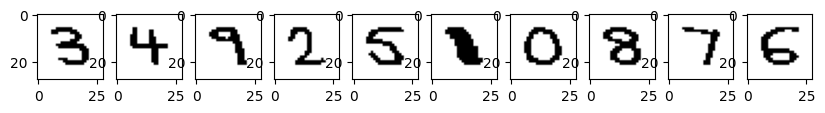

In [10]:
im = ImageManager()

results = im.isolate_digits(image)
reshaped = results.reshape(10, 28, 28)
reshaped.shape

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 5))

for i in range(10):
    axs[i].imshow(reshaped[i], cmap='gray')

plt.show()

In [11]:
NUMBER_OF_NEURAL_NETWORKS = 1
NEURON_COUNT = 64

In [12]:

dataset_manager = DatasetManager()

neural_networks = [
    NeuralNetwork(dataset_manager.training_data, NEURON_COUNT) 
    for i in range(NUMBER_OF_NEURAL_NETWORKS)
]

nn_service = NNService(neural_networks, dataset_manager.testing_data)
nn_service.train_networks()

image_manager = ImageManager()

Accuracy : 0.09 | [______________________________] | Iteration : 1 / 6000 | Latest Iteration Took : 308ms
Accuracy : 0.65 | [______________________________] | Iteration : 51 / 6000 | Latest Iteration Took : 42ms
Accuracy : 0.75 | [______________________________] | Iteration : 101 / 6000 | Latest Iteration Took : 43ms
Accuracy : 0.8 | [______________________________] | Iteration : 151 / 6000 | Latest Iteration Took : 42ms
Accuracy : 0.82 | [=_____________________________] | Iteration : 201 / 6000 | Latest Iteration Took : 43ms
Accuracy : 0.84 | [=_____________________________] | Iteration : 251 / 6000 | Latest Iteration Took : 43ms
Accuracy : 0.85 | [=_____________________________] | Iteration : 301 / 6000 | Latest Iteration Took : 43ms
Accuracy : 0.86 | [=_____________________________] | Iteration : 351 / 6000 | Latest Iteration Took : 42ms
Accuracy : 0.87 | [==____________________________] | Iteration : 401 / 6000 | Latest Iteration Took : 43ms
Accuracy : 0.87 | [==___________________

In [13]:
response = []
images = results
for image in images:
    prediction = nn_service.make_predictions(np.asarray([image]).T)[0]
    response.append(int(prediction))

In [14]:
response

[2, 2, 2, 8, 2, 2, 3, 2, 8, 8]